___
# Project-15_Absenteeism
__

In [579]:
# importing project dependencies:

# compute dependency
import numpy as np
# dataframe dependency
import pandas as pd
# visualization dependencies
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# stats dependency
from scipy import stats
# feature_engineering dependency
import feature_engine
# from scraping some data
import webbrowser


import warnings
warnings.filterwarnings('ignore')

In [ ]:
`

In [2]:
df = pd.read_csv('Absenteeism_at_work.csv',sep=';')

In [3]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [4]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [7]:
# shape of the data.
df.shape

(740, 21)

In [8]:
# informationd on the dataset of the values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [9]:
# description of the dataset
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [10]:
# checking for any mising values in the dataset
df.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

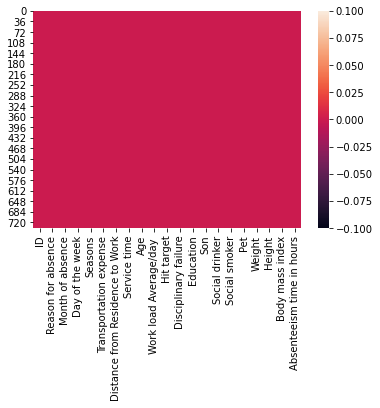

In [11]:
# plotting the missing values
sns.heatmap(df.isna())

In [12]:
# checking for any highly correalted features in the dataset.
df.corr()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,1.000000,-0.064245,-0.000043,0.034468,0.098495,-0.224163,-0.486160,-0.272704,0.040899,0.092457,0.018789,0.004502,-0.036254,0.002767,-0.451338,-0.010826,-0.041418,-0.254222,0.076363,-0.306924,-0.017997
Reason for absence,-0.064245,1.000000,-0.083858,0.116319,-0.117925,-0.119381,0.161831,0.048425,-0.078608,-0.123472,0.088943,-0.545054,-0.047357,-0.055364,0.065441,-0.115702,-0.055911,-0.000269,-0.079267,0.037205,-0.173116
Month of absence,-0.000043,-0.083858,1.000000,-0.006528,0.407770,0.137525,-0.003887,-0.062862,-0.001520,-0.169989,-0.460453,0.107946,-0.066128,0.079031,0.056226,-0.038603,0.047787,0.023278,-0.068942,0.051046,0.024345
Day of the week,0.034468,0.116319,-0.006528,1.000000,0.046493,0.033988,0.118026,0.021252,0.004459,0.015646,0.030986,-0.015120,0.058516,0.098079,0.041772,0.013156,-0.028885,-0.128980,-0.082133,-0.103578,-0.124361
Seasons,0.098495,-0.117925,0.407770,0.046493,1.000000,0.036995,-0.063108,-0.010904,-0.012089,0.150439,-0.061154,0.151766,-0.002951,0.046950,-0.045982,-0.048671,0.012356,-0.026278,-0.033737,-0.011031,-0.005615
Transportation expense,-0.224163,-0.119381,0.137525,0.033988,0.036995,1.000000,0.262183,-0.349887,-0.227542,0.005438,-0.080193,0.109222,-0.055065,0.383001,0.145117,0.044356,0.400080,-0.207435,-0.194496,-0.136517,0.027585
Distance from Residence to Work,-0.486160,0.161831,-0.003887,0.118026,-0.063108,0.262183,1.000000,0.131730,-0.145886,-0.068677,-0.013865,-0.056527,-0.259605,0.054230,0.452196,-0.075369,0.205941,-0.047859,-0.353372,0.113772,-0.088363
Service time,-0.272704,0.048425,-0.062862,0.021252,-0.010904,-0.349887,0.131730,1.000000,0.670979,-0.000668,-0.007840,-0.000221,-0.213000,-0.047128,0.353141,0.072424,-0.440301,0.455975,-0.053135,0.499718,0.019029
Age,0.040899,-0.078608,-0.001520,0.004459,-0.012089,-0.227542,-0.145886,0.670979,1.000000,-0.039425,-0.039224,0.104304,-0.221882,0.056984,0.213183,0.121738,-0.231226,0.418730,-0.062997,0.470688,0.065760
Work load Average/day,0.092457,-0.123472,-0.169989,0.015646,0.150439,0.005438,-0.068677,-0.000668,-0.039425,1.000000,-0.089445,0.029026,-0.074960,0.027820,-0.033713,0.030968,0.007114,-0.038522,0.103315,-0.090709,0.024749


In [13]:
# helperfunction
def fig_of_size(x,y):
    return plt.figure(figsize=(x,y))

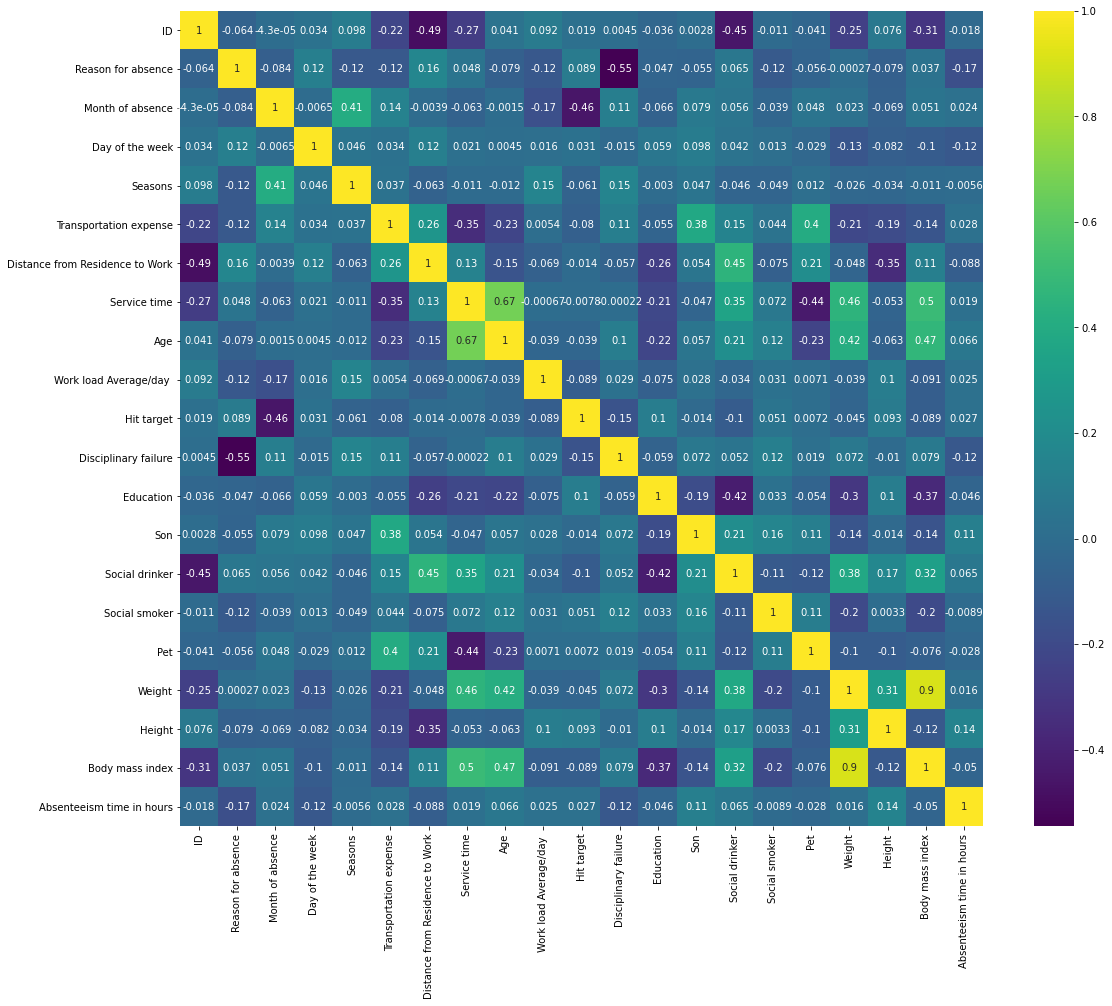

In [14]:
# plotting the correaltion
fig_of_size(18,15)
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [15]:
df.shape

(740, 21)

* Initial Inferences:
    * There are 740 samples in this dataset.
    * The dataset containes 20 feature variables and 1 target variable.
    * All the features as well as the target variable are of numerical datatype.
    * There are no missing values in the dataset.
    * The highest correaltion between 2 features is 0.55 , thus there are no extremely corelated features in this dataset.

## Analysis

In [16]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [17]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [18]:
df.rename({'ID':'I_D'},axis=1)

,I_D,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35,0


In [19]:
# iterate though all the columns of thedataset and replace ' ' with '_' for easy feature name access.
for col in df.columns:
    #col.replace(' ','_'))
    df.rename({col:col.replace(' ','_')},axis=1,inplace=True)

In [20]:
# Reason of Absence.

In [21]:
df.head()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [22]:
df.Reason_for_absence.value_counts().sort_index()

0      43
1      16
2       1
3       1
4       2
5       3
6       8
7      15
8       6
9       4
10     25
11     26
12      8
13     55
14     19
15      2
16      3
17      1
18     21
19     40
21      6
22     38
23    149
24      3
25     31
26     33
27     69
28    112
Name: Reason_for_absence, dtype: int64

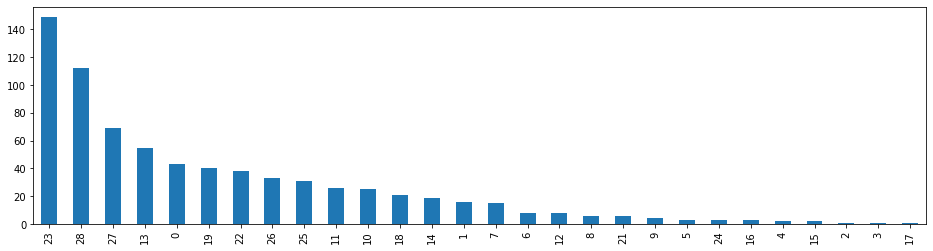

In [23]:
fig_of_size(16,4)
df.Reason_for_absence.value_counts().sort_values(ascending=False).plot(kind='bar')

* 0 to 28 are the indexes of the specific reason for being absent fog wrok.
* Reason no 23 and 28 are the most for being absent.

In [24]:
# Trasportation Expenses

* This are the expenses required for the employee for travelling to and fro the Company Sector.

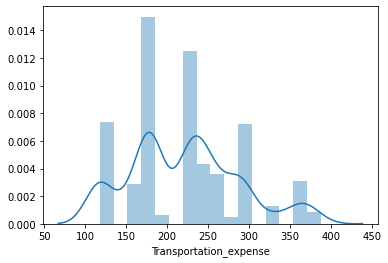

In [25]:
sns.distplot(df.Transportation_expense)

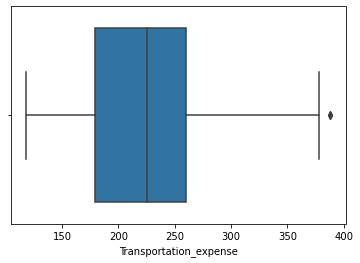

In [26]:
sns.boxplot(df.Transportation_expense)

In [27]:
df.Transportation_expense.min()

118

In [28]:
df.Transportation_expense.max()

388

In [29]:
df[df.Transportation_expense > 300].Absenteeism_time_in_hours.median()

8.0

In [30]:
df[df.Transportation_expense < 200].Absenteeism_time_in_hours.median()

3.0

* We can clearly see that the longer the distance, the higher the expense the high the median Absenteeism observed!

In [31]:
# month od absent

In [32]:
df

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35,0


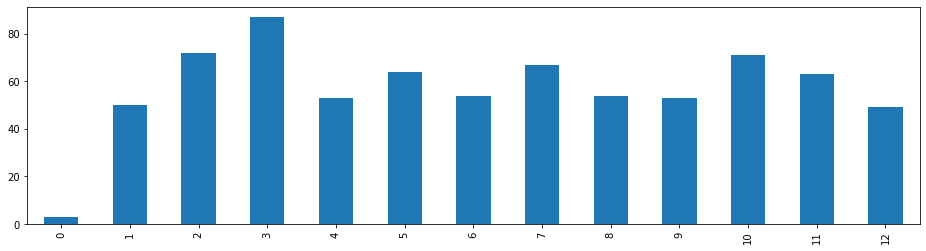

In [33]:
fig_of_size(16,4)
df.Month_of_absence.value_counts().sort_index().plot(kind='bar')

In [34]:
# note there is a month wehere the month is 0.

In [35]:
df[df.Month_of_absence == 0]

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
737,4,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35,0
739,35,0,0,6,3,179,45,14,53,271.219,95,0,1,1,0,0,1,77,175,25,0


let's drop these 3 rows

In [36]:
df = df[df.Month_of_absence != 0]

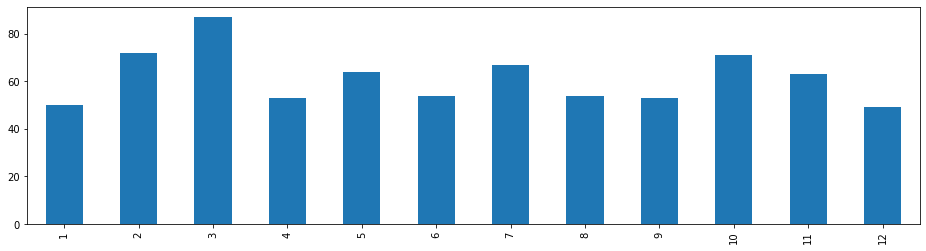

In [37]:
fig_of_size(16,4)
df.Month_of_absence.value_counts().sort_index().plot(kind='bar')

In [38]:
# season

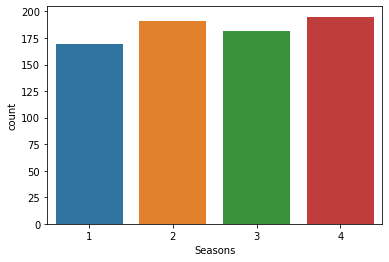

In [39]:
sns.countplot(df.Seasons)

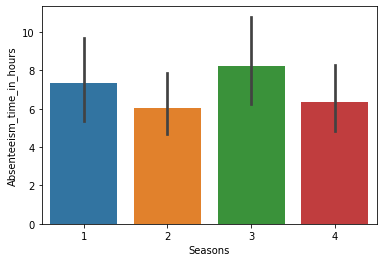

In [40]:
sns.barplot(df.Seasons,df.Absenteeism_time_in_hours)

* Most of the Absenteeism is observed in the months of Fall, i.e., betwwen september and november.

In [41]:
# service time

In [42]:
df.Service_time.value_counts()

18    147
9     126
14     83
13     72
12     61
10     55
11     50
16     38
3      24
17     20
4      16
8      13
6       7
1       7
7       7
29      5
15      4
24      2
Name: Service_time, dtype: int64

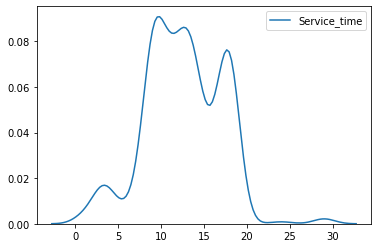

In [43]:
sns.kdeplot(df.Service_time)

(array([ 31.,  23., 146., 166., 155.,  62., 147.,   0.,   2.,   5.]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <a list of 10 Patch objects>)

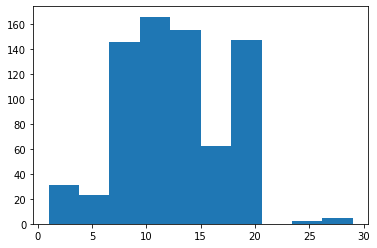

In [44]:
plt.hist(df.Service_time)

In [45]:
df[df.Service_time < 10]

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
6,10,22,7,6,1,361,52,3,28,239.554,97,0,1,1,1,0,4,80,172,27,8
20,18,10,8,4,1,330,16,4,28,205.917,92,0,2,0,0,0,0,84,182,25,8
22,10,13,8,2,1,361,52,3,28,205.917,92,0,1,1,1,0,4,80,172,27,40
25,10,25,8,2,1,361,52,3,28,205.917,92,0,1,1,1,0,4,80,172,27,7
27,30,28,8,4,1,157,27,6,29,205.917,92,0,1,0,1,1,0,75,185,22,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,12,22,6,5,1,233,51,1,31,275.089,96,0,2,1,1,0,8,68,178,21,8
724,12,22,6,4,1,233,51,1,31,275.089,96,0,2,1,1,0,8,68,178,21,3
726,12,19,7,6,1,233,51,1,31,264.604,93,0,2,1,1,0,8,68,178,21,2
732,10,22,7,4,1,361,52,3,28,264.604,93,0,1,1,1,0,4,80,172,27,8


In [46]:
df[((df.Service_time > 10) & (df.Service_time < 20))]

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,9,6,7,3,1,228,14,16,58,264.604,93,0,1,2,0,0,1,65,172,22,120
730,6,22,7,3,1,189,29,13,33,264.604,93,0,1,2,0,0,2,69,167,25,16
734,13,13,7,2,1,369,17,12,31,264.604,93,0,1,3,1,0,0,70,169,25,80
735,11,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8


In [47]:
df[df.Service_time > 20]

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
234,32,28,6,2,1,289,48,29,49,377.550,94,0,1,0,0,0,2,108,172,36,2
507,32,4,10,5,4,289,48,29,49,284.853,91,0,1,0,0,0,2,108,172,36,1
510,32,14,10,4,4,289,48,29,49,284.853,91,0,1,0,0,0,2,108,172,36,3
513,32,23,10,5,4,289,48,29,49,284.853,91,0,1,0,0,0,2,108,172,36,2
576,32,10,1,5,2,289,48,29,49,313.532,96,0,1,0,0,0,2,108,172,36,8
647,16,23,3,4,3,118,15,24,46,222.196,99,0,1,2,1,1,0,75,175,25,8
706,16,7,6,4,3,118,15,24,46,275.089,96,0,1,2,1,1,0,75,175,25,8


In [48]:
df[df.Service_time < 10].Age.median(),df[df.Service_time < 10].Age.mean()

(28.0, 29.17)

In [49]:
df[((df.Service_time > 10) & (df.Service_time < 20))].Age.median(),df[((df.Service_time > 10) & (df.Service_time < 20))].Age.mean()

(38.0, 39.23157894736842)

In [50]:
df[df.Service_time > 20].Age.median(),df[df.Service_time > 20].Age.mean()

(49.0, 48.142857142857146)

* BMI

In [51]:
df[df.Service_time < 10].Body_mass_index.median(),df[df.Service_time < 10].Body_mass_index.mean()

(24.0, 23.075)

In [52]:
df[((df.Service_time > 10) & (df.Service_time < 20))].Body_mass_index.median(),df[((df.Service_time > 10) & (df.Service_time < 20))].Body_mass_index.mean()

(29.0, 27.92)

In [53]:
df[df.Service_time > 20].Body_mass_index.median(),df[df.Service_time > 20].Body_mass_index.mean()

(36.0, 32.857142857142854)

* The mean and median service time increases as the age of the employee increases.
* We can see that there is trend here but is rather awkwark - The higher the service time, the higher you BMI.

In [54]:
## Age

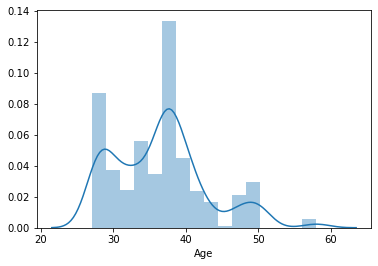

In [55]:
sns.distplot(df.Age)

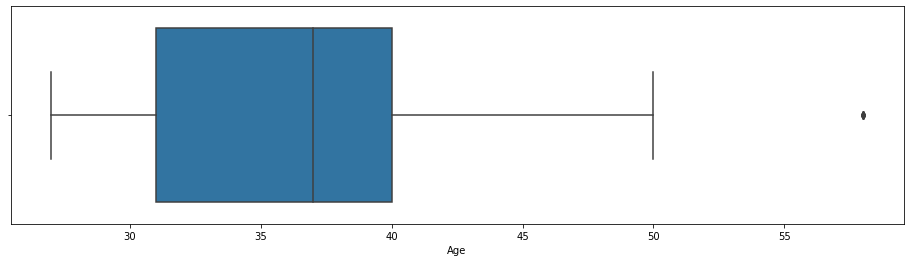

In [56]:
fig_of_size(16,4)
sns.boxplot(df.Age)

In [57]:
df.Age.describe()

count    737.000000
mean      36.419267
std        6.461156
min       27.000000
25%       31.000000
50%       37.000000
75%       40.000000
max       58.000000
Name: Age, dtype: float64

In [58]:
## Work_load_average.

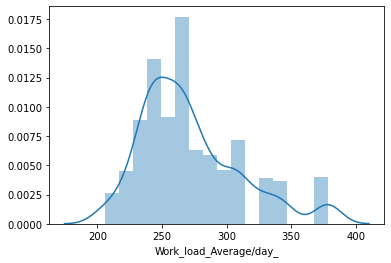

In [59]:
sns.distplot(df['Work_load_Average/day_'])

* Has a near about normal distribution.

In [60]:
# Hit target

* Hit target is achievement of periodic goals in percentage.

(array([ 19.,   0.,   0.,  40.,   0., 124., 139., 147., 155., 113.]),
 array([ 81. ,  82.9,  84.8,  86.7,  88.6,  90.5,  92.4,  94.3,  96.2,
         98.1, 100. ]),
 <a list of 10 Patch objects>)

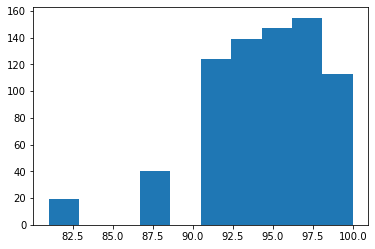

In [61]:
plt.hist(df.Hit_target)

In [62]:
df[df.Hit_target < 90].head()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
270,3,11,9,2,1,179,51,18,38,294.217,81,0,1,0,1,0,0,89,170,31,8
271,3,23,9,6,1,179,51,18,38,294.217,81,0,1,0,1,0,0,89,170,31,3
272,11,19,9,4,1,289,36,13,33,294.217,81,0,1,2,1,0,1,90,172,30,24
273,5,0,9,5,1,235,20,13,43,294.217,81,1,1,1,1,0,0,106,167,38,0
274,24,9,9,2,1,246,25,16,41,294.217,81,0,1,0,1,0,0,67,170,23,16


In [63]:
len(df[df.Hit_target < 90])

59

In [64]:
# Displinary_failure.

In [65]:
df.Disciplinary_failure

0      0
1      1
2      0
3      0
4      0
      ..
732    0
733    0
734    0
735    0
736    0
Name: Disciplinary_failure, Length: 737, dtype: int64

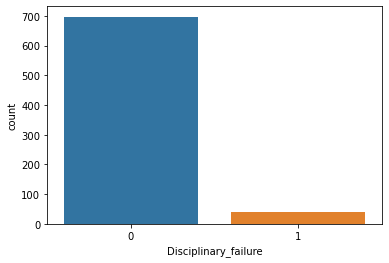

In [66]:
sns.countplot(df.Disciplinary_failure)

In [67]:
df.Disciplinary_failure.value_counts()

0    697
1     40
Name: Disciplinary_failure, dtype: int64

In [68]:
df[df.Disciplinary_failure == 1].Son.mean()

1.35

In [69]:
df[df.Disciplinary_failure == 0].Son.mean()

0.9985652797704447

In [70]:
df[df.Disciplinary_failure == 1].Pet.mean()

0.85

In [71]:
df[df.Disciplinary_failure == 0].Pet.mean()

0.727403156384505

* We can see that the the employees with pets and/or children have positive disciplinary_failure record.

In [72]:
df

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,10,22,7,4,1,361,52,3,28,264.604,93,0,1,1,1,0,4,80,172,27,8
733,28,22,7,4,1,225,26,9,28,264.604,93,0,1,1,0,0,2,69,169,24,8
734,13,13,7,2,1,369,17,12,31,264.604,93,0,1,3,1,0,0,70,169,25,80
735,11,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8


In [73]:
# Social Drinker and/or Social Smokers.

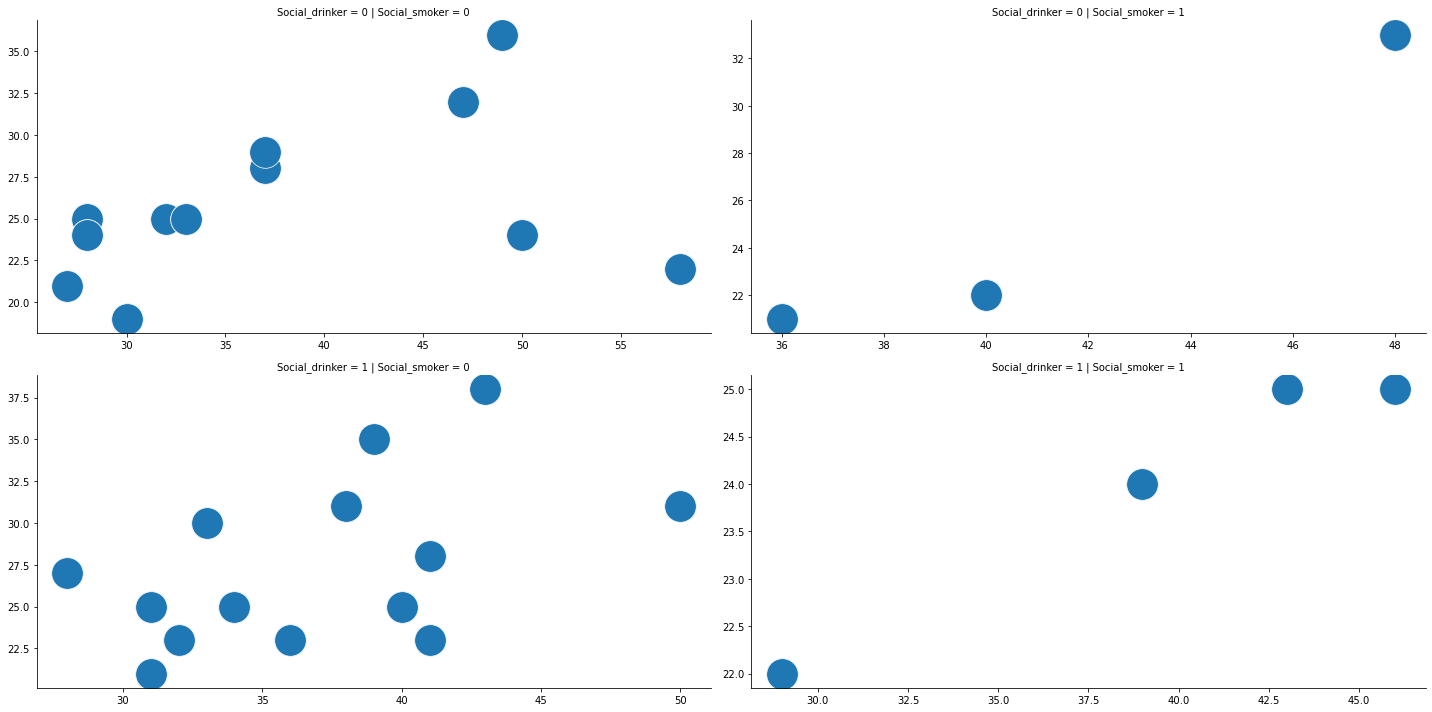

In [74]:
g = sns.FacetGrid(df,row='Social_drinker',col='Social_smoker',sharex=False,sharey=False,aspect=2,height=5)
g.map_dataframe(sns.scatterplot,x='Age',y='Body_mass_index',s=1000)

* Most of the employess are nither smokers or drinkers or drinking non smokers. 

In [75]:
# Social_smokers

In [76]:
df.Social_smoker.value_counts()

0    683
1     54
Name: Social_smoker, dtype: int64

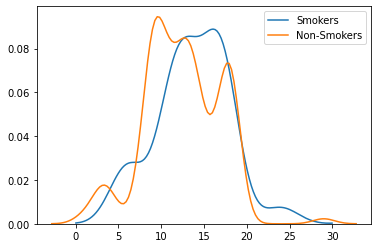

In [77]:
sns.kdeplot(df[df.Social_smoker != 0].Service_time,label='Smokers')

sns.kdeplot(df[df.Social_smoker == 0].Service_time,label='Non-Smokers')

* The employees who smoke have high service time than the ones who do not smoke.

In [78]:
# Education

In [79]:
df.Education.value_counts()

1    608
3     79
2     46
4      4
Name: Education, dtype: int64

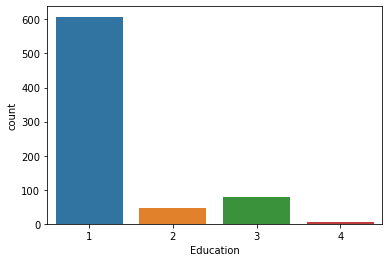

In [80]:
sns.countplot(df.Education)

In [81]:
df[df.Education == 1].head()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [82]:
df[df.Education != 1].head()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
9,1,22,7,2,1,235,11,14,37,239.554,97,0,3,1,0,0,1,88,172,29,8
20,18,10,8,4,1,330,16,4,28,205.917,92,0,2,0,0,0,0,84,182,25,8
32,1,23,8,5,1,235,11,14,37,205.917,92,0,3,1,0,0,1,88,172,29,4
65,22,23,10,5,4,179,26,9,30,253.465,93,0,3,0,0,0,0,56,171,19,1
83,17,21,11,5,4,179,22,17,40,306.345,93,0,2,2,0,1,0,63,170,22,8


In [83]:
df[df.Education == 1].Service_time.median()

13.0

In [84]:
df[df.Education != 1].Service_time.median()

9.0

In [85]:
## ID

In [86]:
df.ID.value_counts()#[df.ID == 11]

3     113
28     76
34     55
22     46
20     42
11     40
15     37
36     34
24     30
14     29
33     24
10     24
1      23
17     20
5      19
18     16
13     15
25     10
6       8
9       8
23      8
27      7
30      7
12      7
7       6
2       6
29      5
26      5
32      5
21      3
31      3
19      3
16      2
8       1
Name: ID, dtype: int64

In [87]:
# total employees
df.ID.unique()

array([11, 36,  3,  7, 10, 20, 14,  1, 24,  6, 33, 18, 30,  2, 19, 27, 34,
        5, 15, 29, 28, 13, 22, 17, 31, 23, 32,  9, 26, 21,  8, 25, 12, 16],
      dtype=int64)

In [88]:
len(df.ID.unique())

34

In [89]:
df[df.ID == 3]

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
5,3,23,7,6,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
13,3,11,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,1
14,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,4
16,3,23,7,6,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,3,27,3,5,2,179,51,18,38,222.196,99,0,1,0,1,0,0,89,170,31,3
645,3,27,3,6,2,179,51,18,38,222.196,99,0,1,0,1,0,0,89,170,31,3
646,3,27,3,3,3,179,51,18,38,222.196,99,0,1,0,1,0,0,89,170,31,3
649,3,27,3,4,3,179,51,18,38,222.196,99,0,1,0,1,0,0,89,170,31,3


* There are total records of  34 employees in the dataset.
* ID 3 is the employee with the most absenteeism records
* ID 3 is the employee with the most absentee records.

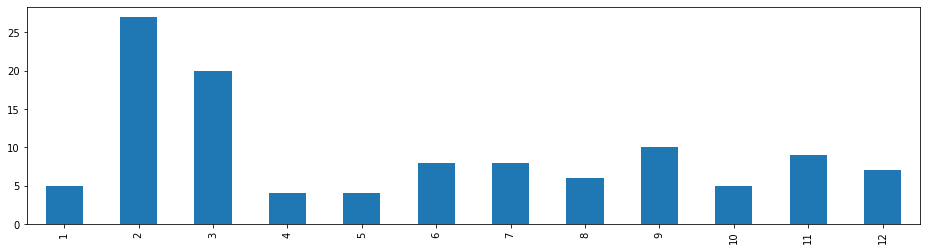

In [90]:
fig_of_size(16,4)
df[df.ID == 3].Month_of_absence.value_counts().sort_index().plot(kind='bar')

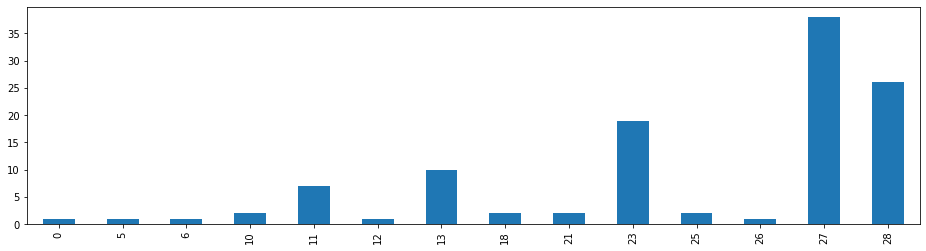

In [91]:
fig_of_size(16,4)
df[df.ID == 3].Reason_for_absence.value_counts().sort_index().plot(kind='bar')

* 27 and 28 are the main reason for employee with ID 3 being absent.
* The reason 27 and 28 are physiotherapy and  dental consultation repectively.

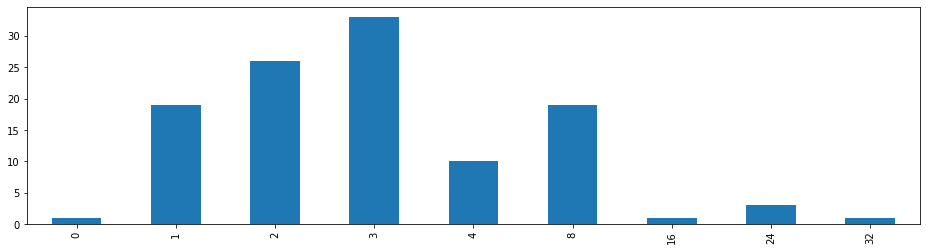

In [92]:
fig_of_size(16,4)
df[df.ID == 3].Absenteeism_time_in_hours.value_counts().sort_index().plot(kind='bar')

* The employee with ID 3 takes mostly half days or less than that leave, maybe for visiting the clinic.

In [560]:
# trasnport expense and Distance from residence to work

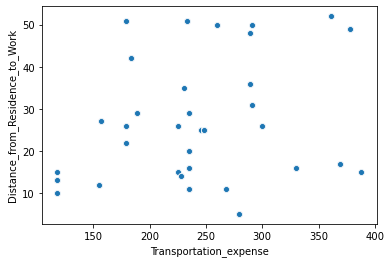

In [562]:
sns.scatterplot(df.Transportation_expense,df.Distance_from_Residence_to_Work)

* We can imply that every employee takes a different model as tranfer to reach the company irrespecitve of the distance as we can see that there is no linear relation betwwen the Transportation expenses and the Distance from residence to work.

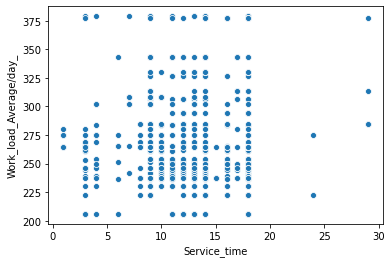

In [574]:
sns.scatterplot(df.Service_time,df['Work_load_Average/day_'])

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


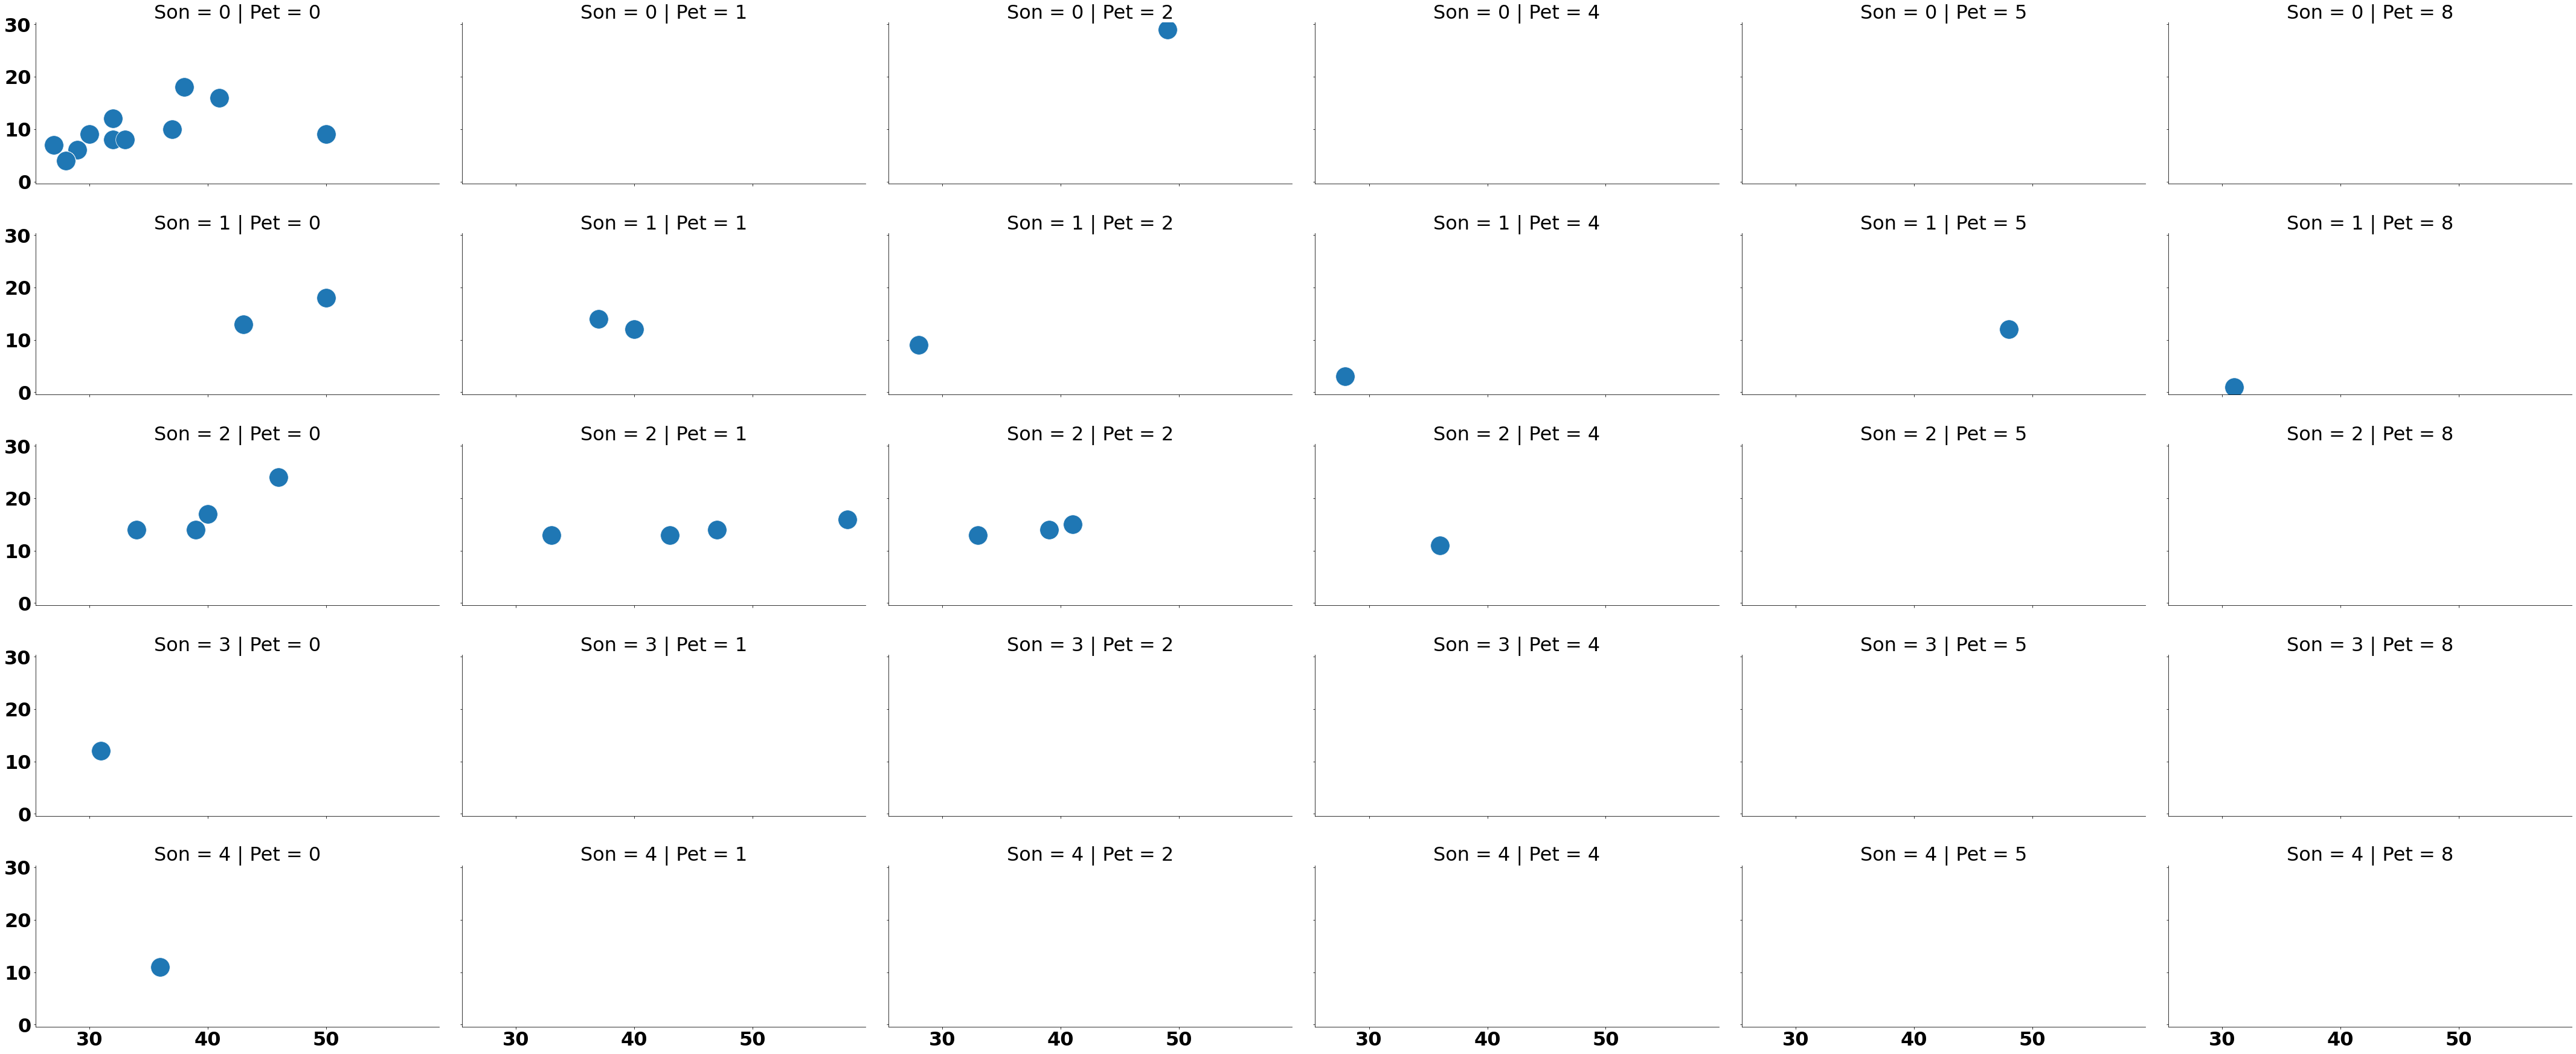

In [581]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 32}
matplotlib.rc('font', **font)

g = sns.FacetGrid(df,row='Son',col='Pet',aspect=2,height=5)
g.map_dataframe(sns.scatterplot,x='Age',y='Service_time',s=1000)

* Most of the employees either do not have son and pet or have 2 sons and 1,2,3 pet/s.
* There's an employee who have eight pets and no son.

In [583]:
df[df.Pet == 8]

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
564,12,18,12,2,4,233,51,1,31,280.549,98,0,2,1,1,0,8,68,178,21,8
594,12,19,2,2,2,233,51,1,31,264.249,97,0,2,1,1,0,8,68,178,21,2
603,12,12,2,4,2,233,51,1,31,264.249,97,0,2,1,1,0,8,68,178,21,3
712,12,19,6,6,3,233,51,1,31,275.089,96,0,2,1,1,0,8,68,178,21,8
721,12,22,6,5,1,233,51,1,31,275.089,96,0,2,1,1,0,8,68,178,21,8
724,12,22,6,4,1,233,51,1,31,275.089,96,0,2,1,1,0,8,68,178,21,3
726,12,19,7,6,1,233,51,1,31,264.604,93,0,2,1,1,0,8,68,178,21,2


In [585]:
# age vs work load

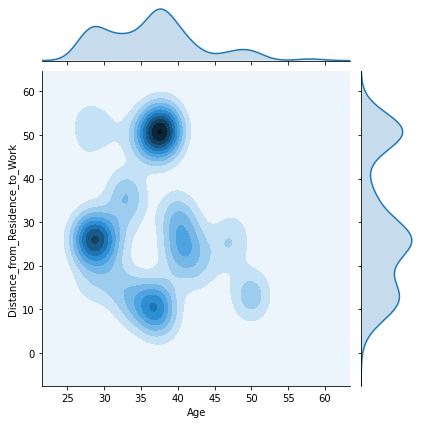

In [599]:
font = {'weight' : 'normal',
        'size'   : 10}

matplotlib.rc('font', **font)
sns.jointplot('Age','Distance_from_Residence_to_Work',data=df,kind='kde')

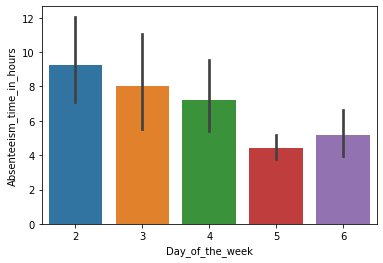

In [604]:
sns.barplot(df.Day_of_the_week,df.Absenteeism_time_in_hours)

In [611]:
px.bar(df,df.Day_of_the_week,df.Absenteeism_time_in_hours,color=df.Absenteeism_time_in_hours)

* Considering sunday to saturday as 1 to 7, most of the emplyees tend to be absent/late on monday.

In [93]:
# feature engineering the reason for absence column.

In [94]:
df.Reason_for_absence

0      26
1       0
2      23
3       7
4      23
       ..
732    22
733    22
734    13
735    14
736    11
Name: Reason_for_absence, Length: 737, dtype: int64

In [95]:
# lets create a new dataframe which will have the featrue engineered cols .

In [255]:
df_cleaned = df.copy()

In [256]:
df_cleaned.head()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [257]:
from feature_engine.categorical_encoders import OneHotCategoricalEncoder

In [258]:
df_cleaned.Reason_for_absence.dtype

dtype('int64')

In [259]:
df_cleaned.sort_values('Reason_for_absence',inplace=True)

In [260]:
df_cleaned.head()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
446,3,0,6,6,3,179,51,18,38,253.957,95,1,1,0,1,0,0,89,170,31,0
213,7,0,5,4,3,279,5,14,39,378.884,92,1,1,2,1,1,0,68,168,24,0
303,5,0,10,6,4,235,20,13,43,265.017,88,1,1,1,1,0,0,106,167,38,0
276,8,0,9,3,1,231,35,14,39,294.217,81,1,1,2,1,0,2,100,170,35,0
311,20,0,10,3,4,260,50,11,36,265.017,88,1,1,4,1,0,0,65,168,23,0


In [261]:
df_cleaned.Reason_for_absence.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int64)

In [262]:
df_cleaned.Reason_for_absence = df_cleaned.Reason_for_absence.apply(str)

In [263]:
df_cleaned.Reason_for_absence.dtype

dtype('O')

In [264]:
enc = OneHotCategoricalEncoder(variables=['Reason_for_absence'],drop_last=True)

In [265]:
df_cleaned = enc.fit_transform(df_cleaned)

In [266]:
df_cleaned.head()

,ID,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours,Reason_for_absence_0,Reason_for_absence_1,Reason_for_absence_2,Reason_for_absence_3,Reason_for_absence_4,Reason_for_absence_5,Reason_for_absence_6,Reason_for_absence_7,Reason_for_absence_8,Reason_for_absence_9,Reason_for_absence_10,Reason_for_absence_11,Reason_for_absence_12,Reason_for_absence_13,Reason_for_absence_14,Reason_for_absence_15,Reason_for_absence_16,Reason_for_absence_17,Reason_for_absence_18,Reason_for_absence_19,Reason_for_absence_21,Reason_for_absence_22,Reason_for_absence_23,Reason_for_absence_24,Reason_for_absence_25,Reason_for_absence_26,Reason_for_absence_27
446,3,6,6,3,179,51,18,38,253.957,95,1,1,0,1,0,0,89,170,31,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
213,7,5,4,3,279,5,14,39,378.884,92,1,1,2,1,1,0,68,168,24,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
303,5,10,6,4,235,20,13,43,265.017,88,1,1,1,1,0,0,106,167,38,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
276,8,9,3,1,231,35,14,39,294.217,81,1,1,2,1,0,2,100,170,35,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
311,20,10,3,4,260,50,11,36,265.017,88,1,1,4,1,0,0,65,168,23,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [267]:
# Let's group the reason now according to types.

* I Certain infectious and parasitic diseases
* II Neoplasms
* III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
* IV Endocrine, nutritional and metabolic diseases
* V Mental and behavioural disorders
* VI Diseases of the nervous system
* VII Diseases of the eye and adnexa
* VIII Diseases of the ear and mastoid process
* IX Diseases of the circulatory system
* X Diseases of the respiratory system
* XI Diseases of the digestive system
* XII Diseases of the skin and subcutaneous tissue
* XIII Diseases of the musculoskeletal system and connective tissue
* XIV Diseases of the genitourinary system
* XV Pregnancy, childbirth and the puerperium
* XVI Certain conditions originating in the perinatal period
* XVII Congenital malformations, deformations and chromosomal abnormalities
* XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
* XIX Injury, poisoning and certain other consequences of external causes
* XX External causes of morbidity and mortality
* XXI Factors influencing health status and contact with health services.

In [268]:
Disease_Gp_1 = df_cleaned.loc[: , 'Reason_for_absence_0' : 'Reason_for_absence_13']

In [269]:
Disease_Gp_1

,Reason_for_absence_0,Reason_for_absence_1,Reason_for_absence_2,Reason_for_absence_3,Reason_for_absence_4,Reason_for_absence_5,Reason_for_absence_6,Reason_for_absence_7,Reason_for_absence_8,Reason_for_absence_9,Reason_for_absence_10,Reason_for_absence_11,Reason_for_absence_12,Reason_for_absence_13
446,1,0,0,0,0,0,0,0,0,0,0,0,0,0
213,1,0,0,0,0,0,0,0,0,0,0,0,0,0
303,1,0,0,0,0,0,0,0,0,0,0,0,0,0
276,1,0,0,0,0,0,0,0,0,0,0,0,0,0
311,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,0,0,0,0,0,0,0,0,0,0,0,0,0,0
309,0,0,0,0,0,0,0,0,0,0,0,0,0,0
320,0,0,0,0,0,0,0,0,0,0,0,0,0,0
210,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [270]:
Disease_Gp_2 = df_cleaned.loc[: , 'Reason_for_absence_14' : 'Reason_for_absence_16']

In [271]:
Disease_Gp_2

,Reason_for_absence_14,Reason_for_absence_15,Reason_for_absence_16
446,0,0,0
213,0,0,0
303,0,0,0
276,0,0,0
311,0,0,0
...,...,...,...
307,0,0,0
309,0,0,0
320,0,0,0
210,0,0,0


In [272]:
Disease_Gp_3 = df_cleaned.loc[: , 'Reason_for_absence_17' : 'Reason_for_absence_19']

In [273]:
Disease_Gp_3

,Reason_for_absence_17,Reason_for_absence_18,Reason_for_absence_19
446,0,0,0
213,0,0,0
303,0,0,0
276,0,0,0
311,0,0,0
...,...,...,...
307,0,0,0
309,0,0,0
320,0,0,0
210,0,0,0


In [274]:
Disease_Gp_4 = df_cleaned.loc[: , 'Reason_for_absence_21' : 'Reason_for_absence_27']

In [275]:
Disease_Gp_4

,Reason_for_absence_21,Reason_for_absence_22,Reason_for_absence_23,Reason_for_absence_24,Reason_for_absence_25,Reason_for_absence_26,Reason_for_absence_27
446,0,0,0,0,0,0,0
213,0,0,0,0,0,0,0
303,0,0,0,0,0,0,0
276,0,0,0,0,0,0,0
311,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
307,0,0,0,0,0,0,0
309,0,0,0,0,0,0,0
320,0,0,0,0,0,0,0
210,0,0,0,0,0,0,0


In [276]:
# now we have grouped reasons for absenteeism.

In [277]:
# let's do an or the OR on every grouped dataset. 

In [278]:
DG1 = pd.Series(Disease_Gp_1.max(axis=1).astype(int),name='DG1')
DG2 = pd.Series(Disease_Gp_2.max(axis=1).astype(int),name='DG2')
DG3 = pd.Series(Disease_Gp_3.max(axis=1).astype(int),name='DG3')
DG4 = pd.Series(Disease_Gp_4.max(axis=1).astype(int),name='DG4')

In [279]:
# Now append these DG[1-4] to the orgiginal dataframe

In [280]:
df_cleaned.head()

,ID,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours,Reason_for_absence_0,Reason_for_absence_1,Reason_for_absence_2,Reason_for_absence_3,Reason_for_absence_4,Reason_for_absence_5,Reason_for_absence_6,Reason_for_absence_7,Reason_for_absence_8,Reason_for_absence_9,Reason_for_absence_10,Reason_for_absence_11,Reason_for_absence_12,Reason_for_absence_13,Reason_for_absence_14,Reason_for_absence_15,Reason_for_absence_16,Reason_for_absence_17,Reason_for_absence_18,Reason_for_absence_19,Reason_for_absence_21,Reason_for_absence_22,Reason_for_absence_23,Reason_for_absence_24,Reason_for_absence_25,Reason_for_absence_26,Reason_for_absence_27
446,3,6,6,3,179,51,18,38,253.957,95,1,1,0,1,0,0,89,170,31,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
213,7,5,4,3,279,5,14,39,378.884,92,1,1,2,1,1,0,68,168,24,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
303,5,10,6,4,235,20,13,43,265.017,88,1,1,1,1,0,0,106,167,38,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
276,8,9,3,1,231,35,14,39,294.217,81,1,1,2,1,0,2,100,170,35,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
311,20,10,3,4,260,50,11,36,265.017,88,1,1,4,1,0,0,65,168,23,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [281]:
df_cleaned.iloc[:,:-27]

,ID,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
446,3,6,6,3,179,51,18,38,253.957,95,1,1,0,1,0,0,89,170,31,0
213,7,5,4,3,279,5,14,39,378.884,92,1,1,2,1,1,0,68,168,24,0
303,5,10,6,4,235,20,13,43,265.017,88,1,1,1,1,0,0,106,167,38,0
276,8,9,3,1,231,35,14,39,294.217,81,1,1,2,1,0,2,100,170,35,0
311,20,10,3,4,260,50,11,36,265.017,88,1,1,4,1,0,0,65,168,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,15,10,3,4,291,31,12,40,265.017,88,0,1,1,1,0,1,73,171,25,4
309,36,10,5,4,118,13,18,50,265.017,88,0,1,1,1,0,0,98,178,31,1
320,20,11,6,4,260,50,11,36,284.031,97,0,1,4,1,0,0,65,168,23,3
210,14,5,2,3,155,12,14,34,378.884,92,0,1,2,1,0,0,95,196,25,2


In [282]:
df_cleaned = pd.concat([df_cleaned.iloc[:,:-27],DG1,DG2,DG3,DG4],axis=1)

In [283]:
df_cleaned.head()

,ID,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours,DG1,DG2,DG3,DG4
446,3,6,6,3,179,51,18,38,253.957,95,1,1,0,1,0,0,89,170,31,0,1,0,0,0
213,7,5,4,3,279,5,14,39,378.884,92,1,1,2,1,1,0,68,168,24,0,1,0,0,0
303,5,10,6,4,235,20,13,43,265.017,88,1,1,1,1,0,0,106,167,38,0,1,0,0,0
276,8,9,3,1,231,35,14,39,294.217,81,1,1,2,1,0,2,100,170,35,0,1,0,0,0
311,20,10,3,4,260,50,11,36,265.017,88,1,1,4,1,0,0,65,168,23,0,1,0,0,0


In [284]:
# reordering the dataframe as it should be
df_cleaned.sort_index(inplace=True)

In [285]:
# let's remove the reason_for_absence column now as we are done feature engineering that feature.
# Let's also drop the ID column  as it is an un important column.

In [286]:
df_cleaned.head()

,ID,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours,DG1,DG2,DG3,DG4
0,11,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4,0,0,0,1
1,36,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0,1,0,0,0
2,3,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2,0,0,0,1
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4,1,0,0,0
4,11,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2,0,0,0,1


In [287]:
df_cleaned.drop('ID',1,inplace=True)

In [288]:
df_cleaned

,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours,DG1,DG2,DG3,DG4
0,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4,0,0,0,1
1,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0,1,0,0,0
2,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2,0,0,0,1
3,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4,1,0,0,0
4,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,7,4,1,361,52,3,28,264.604,93,0,1,1,1,0,4,80,172,27,8,0,0,0,1
733,7,4,1,225,26,9,28,264.604,93,0,1,1,0,0,2,69,169,24,8,0,0,0,1
734,7,2,1,369,17,12,31,264.604,93,0,1,3,1,0,0,70,169,25,80,1,0,0,0
735,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8,0,1,0,0


In [289]:
# reordering the columns at their own indexes .
df_cleaned.columns

Index(['Month_of_absence', 'Day_of_the_week', 'Seasons',
       'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours', 'DG1', 'DG2', 'DG3', 'DG4'],
      dtype='object')

In [290]:
reordered_names = ['DG1', 'DG2', 'DG3', 'DG4','Month_of_absence', 'Day_of_the_week', 'Seasons',
       'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours']

In [294]:
df_cleaned = df_cleaned[reordered_names]

In [295]:
df_cleaned

,DG1,DG2,DG3,DG4,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,0,0,0,1,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,1,0,0,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,0,0,0,1,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,1,0,0,0,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,0,0,0,1,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,0,0,0,1,7,4,1,361,52,3,28,264.604,93,0,1,1,1,0,4,80,172,27,8
733,0,0,0,1,7,4,1,225,26,9,28,264.604,93,0,1,1,0,0,2,69,169,24,8
734,1,0,0,0,7,2,1,369,17,12,31,264.604,93,0,1,3,1,0,0,70,169,25,80
735,0,1,0,0,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8


In [296]:
# Absenteeism_time_in_hours

* This is our target variable.
* The target variable is a real value. But not a continuos one.
* Thus instead of performing regression with will bin these values into 2 bins and make it a classification problem.
* We will use the median value of the Absenteeism_time_in_hours variable as the boundary for the two classes.
* The too classes will be Moderate_Absenteeism and Excessive_Absentism.

In [297]:
## Creating the target vaiable

In [298]:
df_cleaned.head()

,DG1,DG2,DG3,DG4,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,0,0,0,1,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,1,0,0,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,0,0,0,1,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,1,0,0,0,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,0,0,0,1,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [299]:
df_cleaned.Absenteeism_time_in_hours

0       4
1       0
2       2
3       4
4       2
       ..
732     8
733     8
734    80
735     8
736     4
Name: Absenteeism_time_in_hours, Length: 737, dtype: int64

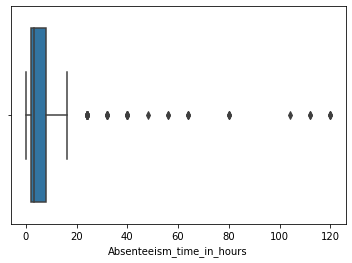

In [300]:
sns.boxplot(df.Absenteeism_time_in_hours)

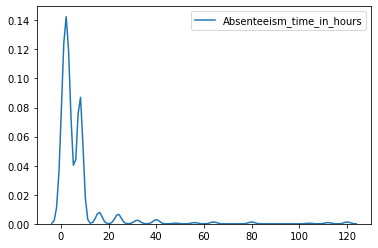

In [301]:
sns.kdeplot(df_cleaned.Absenteeism_time_in_hours)

In [302]:
df.Absenteeism_time_in_hours.median()

3.0

In [303]:
df.Absenteeism_time_in_hours

0       4
1       0
2       2
3       4
4       2
       ..
732     8
733     8
734    80
735     8
736     4
Name: Absenteeism_time_in_hours, Length: 737, dtype: int64

In [304]:
df_cleaned.Absenteeism_time_in_hours = np.where(df_cleaned.Absenteeism_time_in_hours >= df.Absenteeism_time_in_hours.median() ,1,0)

In [305]:
df_cleaned.head()

,DG1,DG2,DG3,DG4,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,0,0,0,1,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,1
1,1,0,0,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,0,0,0,1,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,0
3,1,0,0,0,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,1
4,0,0,0,1,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,0


In [306]:
df_cleaned.rename({'Absenteeism_time_in_hours':'Excessive_Absenteeism_time_in_hours'},axis=1,inplace=True)

In [307]:
df_cleaned.head()

,DG1,DG2,DG3,DG4,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Excessive_Absenteeism_time_in_hours
0,0,0,0,1,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,1
1,1,0,0,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,0,0,0,1,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,0
3,1,0,0,0,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,1
4,0,0,0,1,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,0


In [308]:
df_cleaned.Excessive_Absenteeism_time_in_hours.value_counts()

1    451
0    286
Name: Excessive_Absenteeism_time_in_hours, dtype: int64

In [309]:
df_cleaned.Excessive_Absenteeism_time_in_hours.value_counts() /len(df) *100

1    61.19403
0    38.80597
Name: Excessive_Absenteeism_time_in_hours, dtype: float64

In [310]:
# Removing the outliers from the dataset.

In [311]:
df_cleaned

,DG1,DG2,DG3,DG4,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Excessive_Absenteeism_time_in_hours
0,0,0,0,1,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,1
1,1,0,0,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,0,0,0,1,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,0
3,1,0,0,0,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,1
4,0,0,0,1,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,0,0,0,1,7,4,1,361,52,3,28,264.604,93,0,1,1,1,0,4,80,172,27,1
733,0,0,0,1,7,4,1,225,26,9,28,264.604,93,0,1,1,0,0,2,69,169,24,1
734,1,0,0,0,7,2,1,369,17,12,31,264.604,93,0,1,3,1,0,0,70,169,25,1
735,0,1,0,0,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,1


## Checking and removing the outliers from the dataset.

In [312]:
df_cleaned.head()

,DG1,DG2,DG3,DG4,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Excessive_Absenteeism_time_in_hours
0,0,0,0,1,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,1
1,1,0,0,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,0,0,0,1,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,0
3,1,0,0,0,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,1
4,0,0,0,1,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,0


In [313]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737 entries, 0 to 736
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DG1                                  737 non-null    int32  
 1   DG2                                  737 non-null    int32  
 2   DG3                                  737 non-null    int32  
 3   DG4                                  737 non-null    int32  
 4   Month_of_absence                     737 non-null    int64  
 5   Day_of_the_week                      737 non-null    int64  
 6   Seasons                              737 non-null    int64  
 7   Transportation_expense               737 non-null    int64  
 8   Distance_from_Residence_to_Work      737 non-null    int64  
 9   Service_time                         737 non-null    int64  
 10  Age                                  737 non-null    int64  
 11  Work_load_Average/day_          

In [314]:
cat = 'Month_of_absence Day_of_the_week Seasons Disciplinary_failure Social_drinker Social_smoker Education Pet Son Excessive_Absenteeism_time_in_hours DG1 DG2 DG3 DG4'.split(' ')

In [315]:
for col in cat:
    df_cleaned[col] = df_cleaned[col].astype(object)

In [316]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737 entries, 0 to 736
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DG1                                  737 non-null    object 
 1   DG2                                  737 non-null    object 
 2   DG3                                  737 non-null    object 
 3   DG4                                  737 non-null    object 
 4   Month_of_absence                     737 non-null    object 
 5   Day_of_the_week                      737 non-null    object 
 6   Seasons                              737 non-null    object 
 7   Transportation_expense               737 non-null    int64  
 8   Distance_from_Residence_to_Work      737 non-null    int64  
 9   Service_time                         737 non-null    int64  
 10  Age                                  737 non-null    int64  
 11  Work_load_Average/day_          

In [317]:
# seperating the numerical and the categorcial variables into two different lists/
from feature_engine.missing_data_imputers import _find_categorical_variables,_find_numerical_variables

In [318]:
num_var = _find_numerical_variables(df_cleaned)
cat_var = _find_categorical_variables(df_cleaned)

In [319]:
num_var

['Transportation_expense',
 'Distance_from_Residence_to_Work',
 'Service_time',
 'Age',
 'Work_load_Average/day_',
 'Hit_target',
 'Weight',
 'Height',
 'Body_mass_index']

In [320]:
cat_var

['DG1',
 'DG2',
 'DG3',
 'DG4',
 'Month_of_absence',
 'Day_of_the_week',
 'Seasons',
 'Disciplinary_failure',
 'Education',
 'Son',
 'Social_drinker',
 'Social_smoker',
 'Pet',
 'Excessive_Absenteeism_time_in_hours']

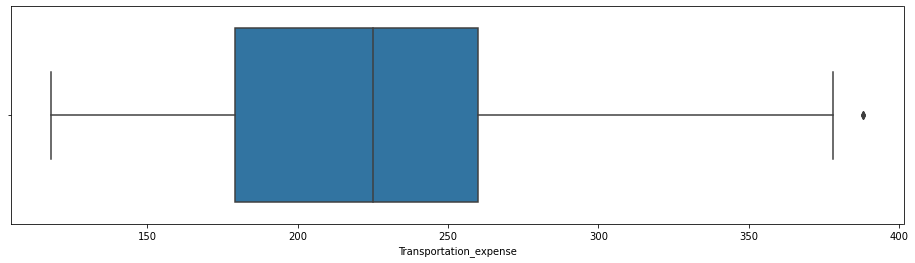

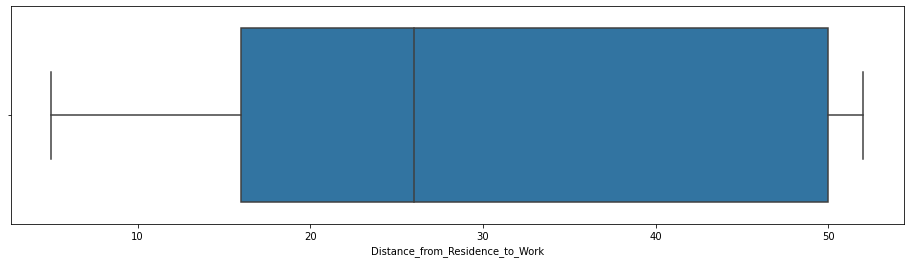

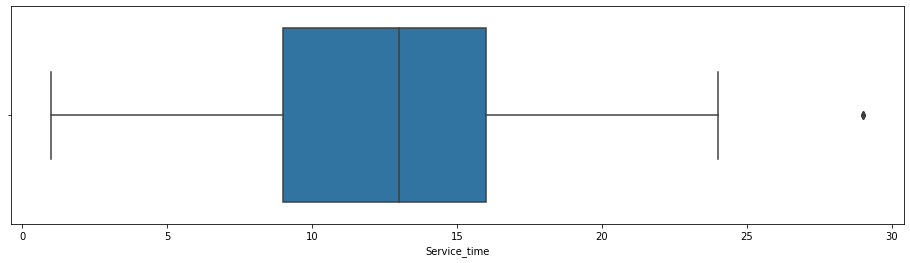

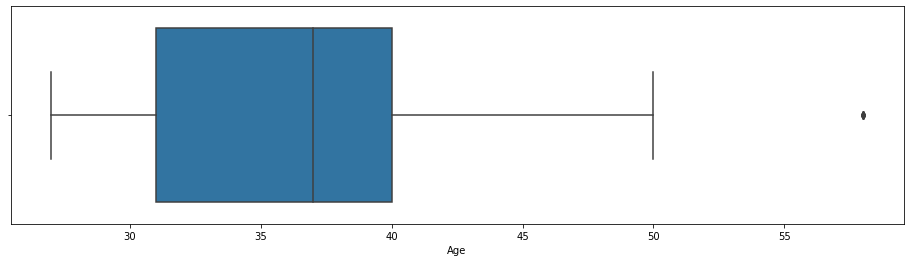

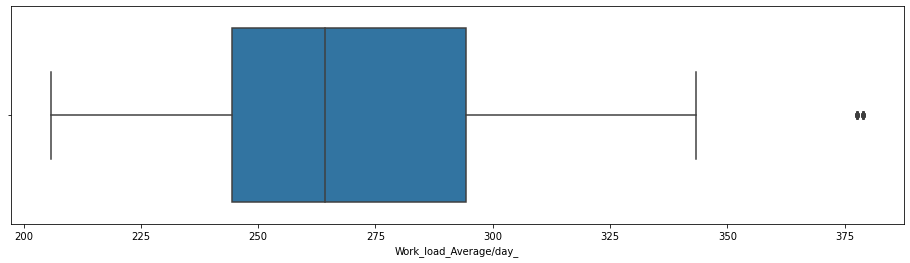

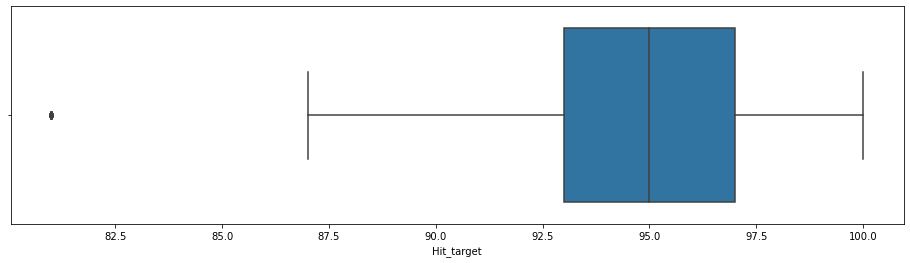

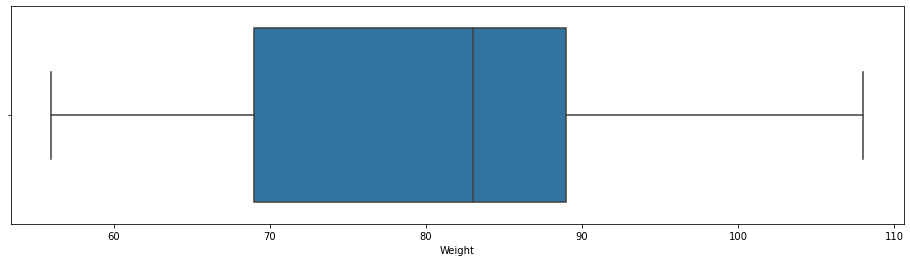

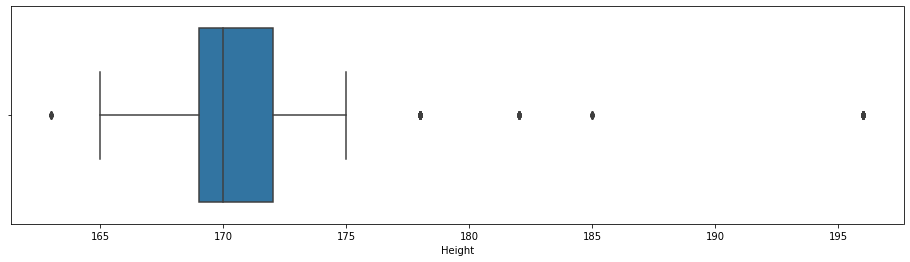

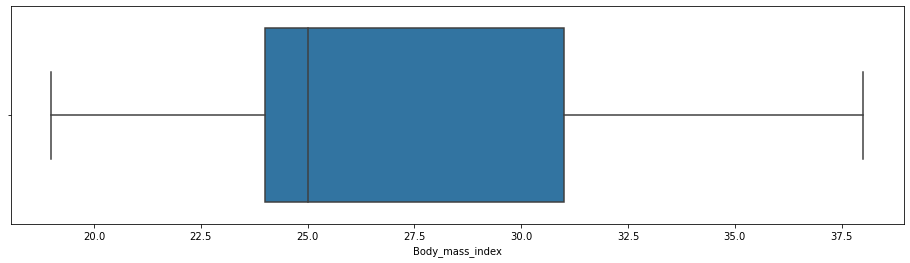

In [321]:
for col in num_var:
    fig_of_size(16,4)
    sns.boxplot(df_cleaned[col])

* We can see that there are a few outliers in the dataset.

In [322]:
len(df_cleaned)

737

In [323]:
# addessing the outliers in the dataset using the z-score
z_scores = stats.zscore(df[num_var])

abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)

df_cleaned = df_cleaned[filtered_entries]


In [324]:
len(df_cleaned)

676

In [325]:
737 - 676

61

* There were 66 outliers in all in the dataset and we have successfully adressed them

In [326]:
# Checking the skew of the numrical variables 

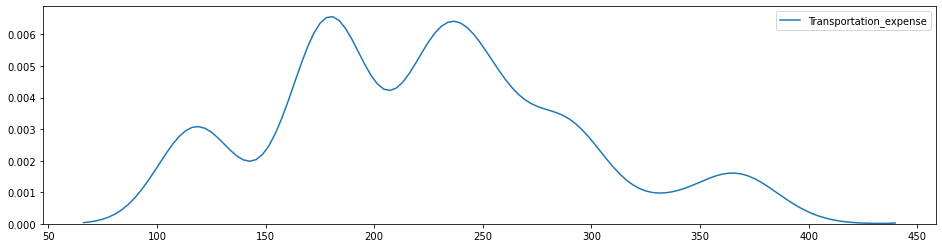

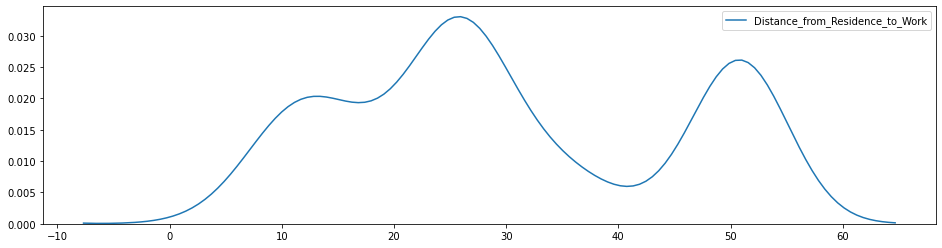

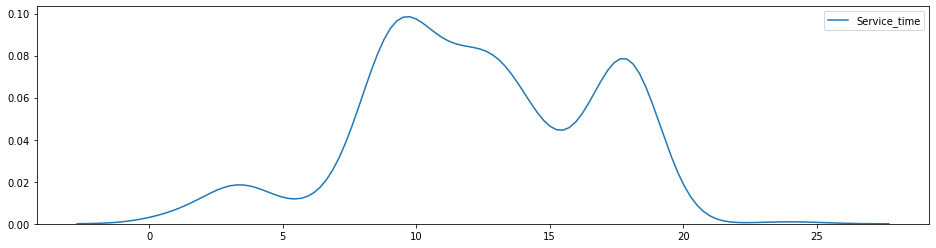

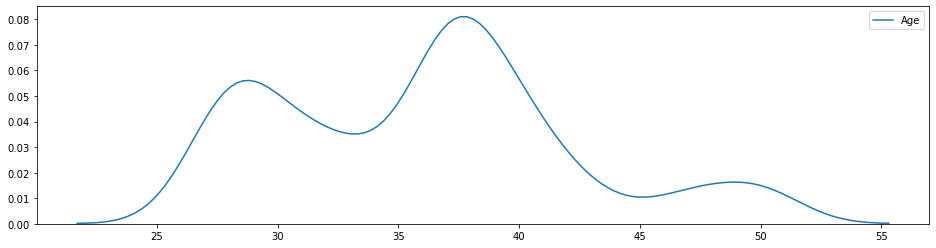

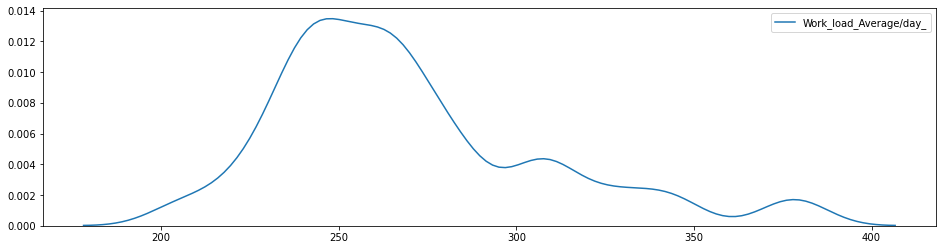

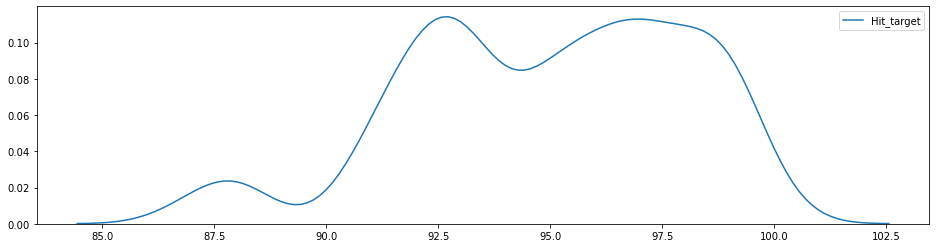

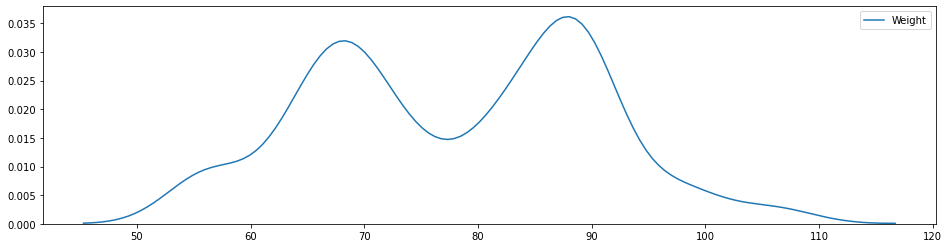

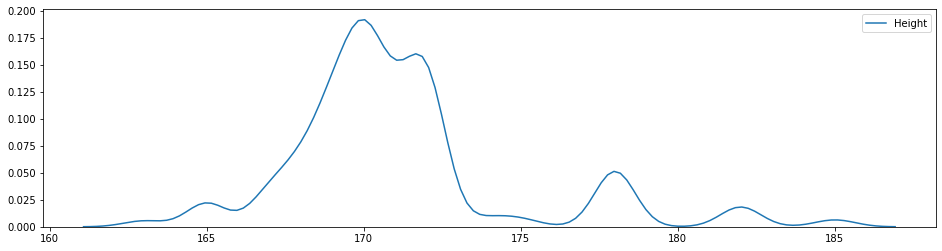

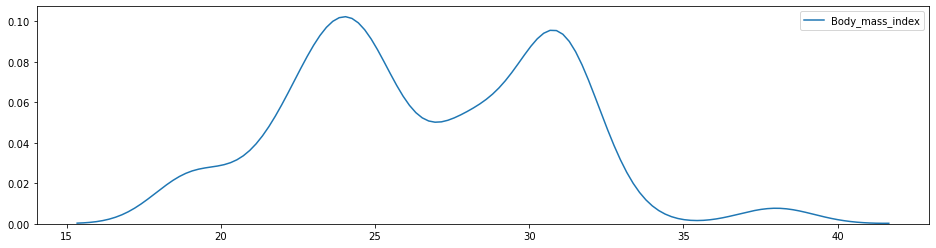

In [327]:
for col in num_var:
    fig_of_size(16,4)
    sns.kdeplot(df_cleaned[col])

* The skews do not look worse just by visualizing the kdeplot, let's check with the actual stats.

In [328]:
df_cleaned.skew()

DG1                                    1.017560
DG2                                    5.152113
DG3                                    3.106144
DG4                                    0.142688
Month_of_absence                       0.109577
Day_of_the_week                        0.076766
Seasons                               -0.064695
Transportation_expense                 0.361384
Distance_from_Residence_to_Work        0.269529
Service_time                          -0.250203
Age                                    0.447180
Work_load_Average/day_                 1.038011
Hit_target                            -0.473758
Disciplinary_failure                   3.988054
Education                              1.958983
Son                                    1.217979
Social_drinker                        -0.190627
Social_smoker                          3.106144
Pet                                    2.631899
Weight                                 0.012939
Height                                 1

In [329]:
# addressing the skewed variables using transformation

In [330]:
#try1 : log transforamtion.
np.log1p(df_cleaned[num_var]).skew()

Transportation_expense            -0.329730
Distance_from_Residence_to_Work   -0.455700
Service_time                      -1.666473
Age                                0.119265
Work_load_Average/day_             0.691283
Hit_target                        -0.542692
Weight                            -0.247243
Height                             1.287750
Body_mass_index                   -0.144600
dtype: float64

In [331]:
#try1 : squart root transforamtion.
np.sqrt(df_cleaned[num_var]).skew()

Transportation_expense             0.013247
Distance_from_Residence_to_Work   -0.061730
Service_time                      -0.941867
Age                                0.273648
Work_load_Average/day_             0.864688
Hit_target                        -0.508288
Weight                            -0.119324
Height                             1.329784
Body_mass_index                    0.013799
dtype: float64

In [332]:

np.cbrt(df_cleaned[num_var]).skew()

Transportation_expense            -0.103011
Distance_from_Residence_to_Work   -0.196246
Service_time                      -1.260091
Age                                0.218126
Work_load_Average/day_             0.806625
Hit_target                        -0.519937
Weight                            -0.163140
Height                             1.315630
Body_mass_index                   -0.043635
dtype: float64

* In our case, the square root transforation is giving us the best results.

In [333]:
df_cleaned[num_var] = np.sqrt(df_cleaned[num_var])

In [334]:
df_cleaned.head()

,DG1,DG2,DG3,DG4,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Excessive_Absenteeism_time_in_hours
0,0,0,0,1,7,3,1,17.000000,6.000000,3.605551,5.744563,15.477532,9.848858,0,1,2,1,0,1,9.486833,13.114877,5.477226,1
1,1,0,0,0,7,3,1,10.862780,3.605551,4.242641,7.071068,15.477532,9.848858,1,1,1,1,0,0,9.899495,13.341664,5.567764,0
2,0,0,0,1,7,4,1,13.379088,7.141428,4.242641,6.164414,15.477532,9.848858,0,1,0,1,0,0,9.433981,13.038405,5.567764,0
3,1,0,0,0,7,5,1,16.703293,2.236068,3.741657,6.244998,15.477532,9.848858,0,1,2,1,1,0,8.246211,12.961481,4.898979,1
4,0,0,0,1,7,5,1,17.000000,6.000000,3.605551,5.744563,15.477532,9.848858,0,1,2,1,0,1,9.486833,13.114877,5.477226,0


## X and y split

In [335]:
X = df_cleaned.iloc[:,:-1]
y = df_cleaned.iloc[:,-1]

In [348]:
# checking the shape of the features and the traget
X.shape,y.shape

((676, 22), (676,))

In [349]:
y = y.astype(int)
y.dtype

dtype('int32')

## Train test split

In [350]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [351]:
# checking the shapes again
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((473, 22), (473,), (203, 22), (203,))

## Standard Scaling

In [377]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [458]:
num_var

['Transportation_expense',
 'Distance_from_Residence_to_Work',
 'Service_time',
 'Age',
 'Work_load_Average/day_',
 'Hit_target',
 'Weight',
 'Height',
 'Body_mass_index']

In [460]:
cat_var[:-1]

['DG1',
 'DG2',
 'DG3',
 'DG4',
 'Month_of_absence',
 'Day_of_the_week',
 'Seasons',
 'Disciplinary_failure',
 'Education',
 'Son',
 'Social_drinker',
 'Social_smoker',
 'Pet']

In [461]:
df_cleaned.columns

Index(['DG1', 'DG2', 'DG3', 'DG4', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Excessive_Absenteeism_time_in_hours'],
      dtype='object')

In [499]:
ctr = ColumnTransformer(transformers=[('sc',StandardScaler(),num_var)],remainder='passthrough')

In [500]:
X_train.shape

(473, 22)

In [501]:
len(num_var + cat_var[:-1])

22

In [506]:
X_train = pd.DataFrame(ctr.fit_transform(X_train),columns=num_var + cat_var[:-1])
X_test = pd.DataFrame(ctr.transform(X_test),columns=num_var + cat_var[:-1])

In [507]:
X_train.head()

,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Weight,Height,Body_mass_index,DG1,DG2,DG3,DG4,Month_of_absence,Day_of_the_week,Seasons,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet
0,0.0684327,-0.170622,-0.632398,-1.3687,-1.05553,-0.93019,-0.728497,-0.568988,-0.606994,1,0,0,0,7,3,1,0,1,1,0,0,2
1,-0.659782,1.32687,1.22614,0.38073,-0.385455,0.0196704,0.884741,-0.298993,1.02083,1,0,0,0,6,6,3,1,1,0,1,0,0
2,0.966958,0.489975,0.273288,-0.460706,-0.0942239,-0.611872,0.960372,0.238625,0.800455,0,1,0,0,7,3,1,0,1,2,1,0,1
3,0.0684327,-0.170622,-0.632398,-1.3687,0.994561,-0.611872,-0.728497,-0.568988,-0.606994,0,0,0,1,11,4,4,0,1,1,0,0,2
4,0.966958,0.489975,0.273288,-0.460706,-1.78268,-0.93019,0.960372,0.238625,0.800455,0,0,1,0,8,2,1,0,1,2,1,0,1


In [508]:
X_test.head()

,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Weight,Height,Body_mass_index,DG1,DG2,DG3,DG4,Month_of_absence,Day_of_the_week,Seasons,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet
0,0.216559,-0.976421,-0.889009,-0.636484,-0.843438,1.26312,-0.222455,1.83299,-0.361111,0,0,0,1,5,5,3,0,3,0,0,0,0
1,-0.659782,1.32687,1.22614,0.38073,-0.87281,-0.611872,0.884741,-0.298993,1.02083,0,0,0,0,12,2,4,0,1,0,1,0,0
2,0.573635,1.27528,-0.158842,0.0512233,-0.652481,0.954647,-1.07818,-0.839784,-0.858056,0,0,1,0,3,2,3,0,1,4,1,0,0
3,1.86548,1.37795,-2.52879,-1.3687,0.0113868,-0.611872,0.183972,0.238625,0.116324,0,0,0,1,11,3,4,0,1,1,1,0,4
4,-0.659782,1.32687,1.22614,0.38073,-1.29254,1.26312,0.884741,-0.298993,1.02083,0,0,0,1,3,5,2,0,1,0,1,0,0


## Building up the model

In [352]:
# importing the training dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [353]:
# importing the evalation metrics 
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score,precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,classification_report

In [369]:
# helper funciton
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    print('Train_Acc:', model.score(X_train,y_train))
    print('Test_Acc:', model.score(X_test,y_test))
    print('Recall:', recall_score(y_test,model.predict(X_test)))
    print('Precision:',recall_score(y_test,model.predict(X_test)))
    print('F1:',recall_score(y_test,model.predict(X_test)))


In [518]:
# try1 : Logistic Regression

train_n_ret_scores(LogisticRegression())

Train_Acc: 0.7061310782241015
Test_Acc: 0.7192118226600985
Recall: 0.8110236220472441
Precision: 0.8110236220472441
F1: 0.8110236220472441


In [510]:
#try2: SVC
train_n_ret_scores(SVC(kernel='linear'))

Train_Acc: 0.7167019027484144
Test_Acc: 0.7339901477832512
Recall: 0.6614173228346457
Precision: 0.6614173228346457
F1: 0.6614173228346457


In [511]:
#try3: KNN
train_n_ret_scores(KNeighborsClassifier())

Train_Acc: 0.7484143763213531
Test_Acc: 0.6699507389162561
Recall: 0.7322834645669292
Precision: 0.7322834645669292
F1: 0.7322834645669292


In [512]:
#try5: Decision Treaes
train_n_ret_scores(DecisionTreeClassifier())

Train_Acc: 0.9767441860465116
Test_Acc: 0.7586206896551724
Recall: 0.84251968503937
Precision: 0.84251968503937
F1: 0.84251968503937


In [513]:
#try4: Random Forest
train_n_ret_scores(RandomForestClassifier())

Train_Acc: 0.9767441860465116
Test_Acc: 0.8029556650246306
Recall: 0.8976377952755905
Precision: 0.8976377952755905
F1: 0.8976377952755905


In [514]:
#try5: Gadient Boosting
train_n_ret_scores(GradientBoostingClassifier())

Train_Acc: 0.8435517970401691
Test_Acc: 0.7536945812807881
Recall: 0.84251968503937
Precision: 0.84251968503937
F1: 0.84251968503937


In [515]:
#try6: Adaboost
train_n_ret_scores(AdaBoostClassifier())

Train_Acc: 0.7864693446088795
Test_Acc: 0.7389162561576355
Recall: 0.8346456692913385
Precision: 0.8346456692913385
F1: 0.8346456692913385


In [516]:
# choosing the best model


models = [LogisticRegression(),SVC(),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=200),GradientBoostingClassifier(n_estimators=150),AdaBoostClassifier(RandomForestClassifier())]
model_names = 'Logistic_reg SVC KNN Random_forest Decision_Treee Gradient_boost Adaboost'.split()
models_df = pd.DataFrame(columns=['Algo','Train_acc','Test_acc','Precision','Recall','F1_score','Avg_CV'])

for (model,model_names) in zip(models,model_names):
    print(model_names)
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    prec = precision_score(y_test,y_preds,average='micro')
    rec = recall_score(y_test,y_preds,average='micro')
    f1 = f1_score(y_test,y_preds,average='micro')
    
    avg_cv = np.mean(cross_val_score(model,X_train,y_train))
    
    models_df = models_df.append({'Algo':model_names,'Train_acc':train_acc,'Test_acc':test_acc,'Precision':prec,'Recall':rec,'F1_score':f1,'Avg_CV':avg_cv},ignore_index=True)

Logistic_reg
SVC
KNN
Random_forest
Decision_Treee
Gradient_boost
Adaboost


In [517]:
models_df

,Algo,Train_acc,Test_acc,Precision,Recall,F1_score,Avg_CV
0,Logistic_reg,0.706131,0.719212,0.719212,0.719212,0.719212,0.665890
1,SVC,0.661734,0.709360,0.709360,0.709360,0.709360,0.632116
2,KNN,0.748414,0.669951,0.669951,0.669951,0.669951,0.562172
3,Random_forest,0.976744,0.763547,0.763547,0.763547,0.763547,0.640470
4,Decision_Treee,0.976744,0.793103,0.793103,0.793103,0.793103,0.703852
5,Gradient_boost,0.881607,0.748768,0.748768,0.748768,0.748768,0.657335
6,Adaboost,0.976744,0.733990,0.733990,0.733990,0.733990,0.680605


* The Decision Tree is giving us the best cross validation result for this dataset.

In [527]:
best_model = DecisionTreeClassifier()

In [528]:
train_n_ret_scores(best_model)

Train_Acc: 0.9767441860465116
Test_Acc: 0.7832512315270936
Recall: 0.8661417322834646
Precision: 0.8661417322834646
F1: 0.8661417322834646


## HyperParameter tunning.

In [530]:
from sklearn.model_selection import GridSearchCV

In [532]:
param_dict = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

gs_cv_model = GridSearchCV(DecisionTreeClassifier(random_state=42), param_dict, verbose=3, cv=3)

In [533]:
gs_cv_model.fit(X_train,y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=2, score=0.627, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=2, score=0.652, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=2, score=0.605, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=3, score=0.627, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=3, score=0.652, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=3, score=0.605, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=4 ...........................
[CV]  ma

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] max_leaf_nodes=4, min_samples_split=4 ...........................
[CV]  max_leaf_nodes=4, min_samples_split=4, score=0.677, total=   0.0s
[CV] max_leaf_nodes=4, min_samples_split=4 ...........................
[CV]  max_leaf_nodes=4, min_samples_split=4, score=0.658, total=   0.0s
[CV] max_leaf_nodes=4, min_samples_split=4 ...........................
[CV]  max_leaf_nodes=4, min_samples_split=4, score=0.541, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=5, min_samples_split=2, score=0.658, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=5, min_samples_split=2, score=0.703, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=5, min_samples_split=2, score=0.541, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=5, min_samples_split=3, score=0.658, total=   0.0

[CV]  max_leaf_nodes=13, min_samples_split=2, score=0.690, total=   0.0s
[CV] max_leaf_nodes=13, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=13, min_samples_split=2, score=0.728, total=   0.0s
[CV] max_leaf_nodes=13, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=13, min_samples_split=2, score=0.707, total=   0.0s
[CV] max_leaf_nodes=13, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=13, min_samples_split=3, score=0.690, total=   0.0s
[CV] max_leaf_nodes=13, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=13, min_samples_split=3, score=0.728, total=   0.0s
[CV] max_leaf_nodes=13, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=13, min_samples_split=3, score=0.707, total=   0.0s
[CV] max_leaf_nodes=13, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=13, min_samples_split=4, score=0.690, total=   0.0s
[CV] max_leaf_nodes=13, min_samples_split=4 ...................

[CV] max_leaf_nodes=21, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=21, min_samples_split=4, score=0.728, total=   0.0s
[CV] max_leaf_nodes=21, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=21, min_samples_split=4, score=0.707, total=   0.0s
[CV] max_leaf_nodes=22, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=22, min_samples_split=2, score=0.665, total=   0.0s
[CV] max_leaf_nodes=22, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=22, min_samples_split=2, score=0.715, total=   0.0s
[CV] max_leaf_nodes=22, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=22, min_samples_split=2, score=0.720, total=   0.0s
[CV] max_leaf_nodes=22, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=22, min_samples_split=3, score=0.665, total=   0.0s
[CV] max_leaf_nodes=22, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=22, min_samples_split=3, score=0.715, total=

[CV]  max_leaf_nodes=30, min_samples_split=2, score=0.652, total=   0.0s
[CV] max_leaf_nodes=30, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=30, min_samples_split=2, score=0.675, total=   0.0s
[CV] max_leaf_nodes=30, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=30, min_samples_split=3, score=0.646, total=   0.0s
[CV] max_leaf_nodes=30, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=30, min_samples_split=3, score=0.652, total=   0.0s
[CV] max_leaf_nodes=30, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=30, min_samples_split=3, score=0.675, total=   0.0s
[CV] max_leaf_nodes=30, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=30, min_samples_split=4, score=0.652, total=   0.0s
[CV] max_leaf_nodes=30, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=30, min_samples_split=4, score=0.652, total=   0.0s
[CV] max_leaf_nodes=30, min_samples_split=4 ...................

[CV]  max_leaf_nodes=38, min_samples_split=4, score=0.658, total=   0.0s
[CV] max_leaf_nodes=38, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=38, min_samples_split=4, score=0.620, total=   0.0s
[CV] max_leaf_nodes=38, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=38, min_samples_split=4, score=0.662, total=   0.0s
[CV] max_leaf_nodes=39, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=39, min_samples_split=2, score=0.658, total=   0.0s
[CV] max_leaf_nodes=39, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=39, min_samples_split=2, score=0.620, total=   0.0s
[CV] max_leaf_nodes=39, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=39, min_samples_split=2, score=0.656, total=   0.0s
[CV] max_leaf_nodes=39, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=39, min_samples_split=3, score=0.658, total=   0.0s
[CV] max_leaf_nodes=39, min_samples_split=3 ...................

[CV]  max_leaf_nodes=47, min_samples_split=2, score=0.620, total=   0.0s
[CV] max_leaf_nodes=47, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=47, min_samples_split=2, score=0.637, total=   0.0s
[CV] max_leaf_nodes=47, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=47, min_samples_split=3, score=0.671, total=   0.0s
[CV] max_leaf_nodes=47, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=47, min_samples_split=3, score=0.620, total=   0.0s
[CV] max_leaf_nodes=47, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=47, min_samples_split=3, score=0.637, total=   0.0s
[CV] max_leaf_nodes=47, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=47, min_samples_split=4, score=0.671, total=   0.0s
[CV] max_leaf_nodes=47, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=47, min_samples_split=4, score=0.627, total=   0.0s
[CV] max_leaf_nodes=47, min_samples_split=4 ...................

[CV]  max_leaf_nodes=55, min_samples_split=4, score=0.671, total=   0.0s
[CV] max_leaf_nodes=55, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=55, min_samples_split=4, score=0.601, total=   0.0s
[CV] max_leaf_nodes=55, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=55, min_samples_split=4, score=0.643, total=   0.0s
[CV] max_leaf_nodes=56, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=56, min_samples_split=2, score=0.671, total=   0.0s
[CV] max_leaf_nodes=56, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=56, min_samples_split=2, score=0.595, total=   0.0s
[CV] max_leaf_nodes=56, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=56, min_samples_split=2, score=0.637, total=   0.0s
[CV] max_leaf_nodes=56, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=56, min_samples_split=3, score=0.671, total=   0.0s
[CV] max_leaf_nodes=56, min_samples_split=3 ...................

[CV]  max_leaf_nodes=64, min_samples_split=2, score=0.658, total=   0.0s
[CV] max_leaf_nodes=64, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=64, min_samples_split=2, score=0.601, total=   0.0s
[CV] max_leaf_nodes=64, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=64, min_samples_split=2, score=0.637, total=   0.0s
[CV] max_leaf_nodes=64, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=64, min_samples_split=3, score=0.652, total=   0.0s
[CV] max_leaf_nodes=64, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=64, min_samples_split=3, score=0.601, total=   0.0s
[CV] max_leaf_nodes=64, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=64, min_samples_split=3, score=0.637, total=   0.0s
[CV] max_leaf_nodes=64, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=64, min_samples_split=4, score=0.652, total=   0.0s
[CV] max_leaf_nodes=64, min_samples_split=4 ...................

[CV]  max_leaf_nodes=72, min_samples_split=2, score=0.601, total=   0.0s
[CV] max_leaf_nodes=72, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=72, min_samples_split=2, score=0.643, total=   0.0s
[CV] max_leaf_nodes=72, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=72, min_samples_split=3, score=0.652, total=   0.0s
[CV] max_leaf_nodes=72, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=72, min_samples_split=3, score=0.608, total=   0.0s
[CV] max_leaf_nodes=72, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=72, min_samples_split=3, score=0.637, total=   0.0s
[CV] max_leaf_nodes=72, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=72, min_samples_split=4, score=0.652, total=   0.0s
[CV] max_leaf_nodes=72, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=72, min_samples_split=4, score=0.589, total=   0.0s
[CV] max_leaf_nodes=72, min_samples_split=4 ...................

[CV]  max_leaf_nodes=80, min_samples_split=3, score=0.665, total=   0.0s
[CV] max_leaf_nodes=80, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=80, min_samples_split=3, score=0.608, total=   0.0s
[CV] max_leaf_nodes=80, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=80, min_samples_split=3, score=0.643, total=   0.0s
[CV] max_leaf_nodes=80, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=80, min_samples_split=4, score=0.633, total=   0.0s
[CV] max_leaf_nodes=80, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=80, min_samples_split=4, score=0.589, total=   0.0s
[CV] max_leaf_nodes=80, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=80, min_samples_split=4, score=0.637, total=   0.0s
[CV] max_leaf_nodes=81, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=81, min_samples_split=2, score=0.671, total=   0.0s
[CV] max_leaf_nodes=81, min_samples_split=2 ...................

[CV]  max_leaf_nodes=88, min_samples_split=3, score=0.637, total=   0.0s
[CV] max_leaf_nodes=88, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=88, min_samples_split=4, score=0.620, total=   0.0s
[CV] max_leaf_nodes=88, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=88, min_samples_split=4, score=0.589, total=   0.0s
[CV] max_leaf_nodes=88, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=88, min_samples_split=4, score=0.637, total=   0.0s
[CV] max_leaf_nodes=89, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=89, min_samples_split=2, score=0.658, total=   0.0s
[CV] max_leaf_nodes=89, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=89, min_samples_split=2, score=0.595, total=   0.0s
[CV] max_leaf_nodes=89, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=89, min_samples_split=2, score=0.656, total=   0.0s
[CV] max_leaf_nodes=89, min_samples_split=3 ...................

[CV]  max_leaf_nodes=96, min_samples_split=3, score=0.637, total=   0.0s
[CV] max_leaf_nodes=96, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=96, min_samples_split=4, score=0.620, total=   0.0s
[CV] max_leaf_nodes=96, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=96, min_samples_split=4, score=0.589, total=   0.0s
[CV] max_leaf_nodes=96, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=96, min_samples_split=4, score=0.637, total=   0.0s
[CV] max_leaf_nodes=97, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=97, min_samples_split=2, score=0.646, total=   0.0s
[CV] max_leaf_nodes=97, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=97, min_samples_split=2, score=0.595, total=   0.0s
[CV] max_leaf_nodes=97, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=97, min_samples_split=2, score=0.650, total=   0.0s
[CV] max_leaf_nodes=97, min_samples_split=3 ...................

[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    6.5s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=3)

In [534]:
gs_cv_model.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=16, random_state=42)

In [535]:
gs_cv_model.best_params_

{'max_leaf_nodes': 16, 'min_samples_split': 2}

In [538]:
gs_cv_model.best_score_

0.7146120562229568

In [539]:
y_preds = gs_cv_model.predict(X_test)

In [537]:
train_n_ret_scores(gs_cv_model)

Fitting 3 folds for each of 294 candidates, totalling 882 fits
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=2, score=0.627, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=2, score=0.652, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=2, score=0.605, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=3, score=0.627, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=3, score=0.652, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=3, score=0.605, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=4 ...........................
[CV]  ma

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] max_leaf_nodes=5, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=5, min_samples_split=2, score=0.658, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=5, min_samples_split=2, score=0.703, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=5, min_samples_split=2, score=0.541, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=5, min_samples_split=3, score=0.658, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=5, min_samples_split=3, score=0.703, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=5, min_samples_split=3, score=0.541, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=4 ...........................
[CV]  max_leaf_nodes=5, min_samples_split=4, score=0.658, total=   0.0

[CV]  max_leaf_nodes=13, min_samples_split=4, score=0.707, total=   0.0s
[CV] max_leaf_nodes=14, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=14, min_samples_split=2, score=0.684, total=   0.0s
[CV] max_leaf_nodes=14, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=14, min_samples_split=2, score=0.728, total=   0.0s
[CV] max_leaf_nodes=14, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=14, min_samples_split=2, score=0.726, total=   0.0s
[CV] max_leaf_nodes=14, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=14, min_samples_split=3, score=0.684, total=   0.0s
[CV] max_leaf_nodes=14, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=14, min_samples_split=3, score=0.728, total=   0.0s
[CV] max_leaf_nodes=14, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=14, min_samples_split=3, score=0.726, total=   0.0s
[CV] max_leaf_nodes=14, min_samples_split=4 ...................

[CV]  max_leaf_nodes=22, min_samples_split=3, score=0.720, total=   0.0s
[CV] max_leaf_nodes=22, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=22, min_samples_split=4, score=0.677, total=   0.0s
[CV] max_leaf_nodes=22, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=22, min_samples_split=4, score=0.715, total=   0.0s
[CV] max_leaf_nodes=22, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=22, min_samples_split=4, score=0.720, total=   0.0s
[CV] max_leaf_nodes=23, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=23, min_samples_split=2, score=0.671, total=   0.0s
[CV] max_leaf_nodes=23, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=23, min_samples_split=2, score=0.709, total=   0.0s
[CV] max_leaf_nodes=23, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=23, min_samples_split=2, score=0.713, total=   0.0s
[CV] max_leaf_nodes=23, min_samples_split=3 ...................

[CV]  max_leaf_nodes=31, min_samples_split=2, score=0.675, total=   0.0s
[CV] max_leaf_nodes=31, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=31, min_samples_split=3, score=0.652, total=   0.0s
[CV] max_leaf_nodes=31, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=31, min_samples_split=3, score=0.646, total=   0.0s
[CV] max_leaf_nodes=31, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=31, min_samples_split=3, score=0.675, total=   0.0s
[CV] max_leaf_nodes=31, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=31, min_samples_split=4, score=0.652, total=   0.0s
[CV] max_leaf_nodes=31, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=31, min_samples_split=4, score=0.646, total=   0.0s
[CV] max_leaf_nodes=31, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=31, min_samples_split=4, score=0.656, total=   0.0s
[CV] max_leaf_nodes=32, min_samples_split=2 ...................

[CV]  max_leaf_nodes=39, min_samples_split=4, score=0.643, total=   0.0s
[CV] max_leaf_nodes=40, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=40, min_samples_split=2, score=0.658, total=   0.0s
[CV] max_leaf_nodes=40, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=40, min_samples_split=2, score=0.620, total=   0.0s
[CV] max_leaf_nodes=40, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=40, min_samples_split=2, score=0.650, total=   0.0s
[CV] max_leaf_nodes=40, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=40, min_samples_split=3, score=0.658, total=   0.0s
[CV] max_leaf_nodes=40, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=40, min_samples_split=3, score=0.620, total=   0.0s
[CV] max_leaf_nodes=40, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=40, min_samples_split=3, score=0.650, total=   0.0s
[CV] max_leaf_nodes=40, min_samples_split=4 ...................

[CV]  max_leaf_nodes=48, min_samples_split=3, score=0.637, total=   0.0s
[CV] max_leaf_nodes=48, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=48, min_samples_split=4, score=0.665, total=   0.0s
[CV] max_leaf_nodes=48, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=48, min_samples_split=4, score=0.627, total=   0.0s
[CV] max_leaf_nodes=48, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=48, min_samples_split=4, score=0.643, total=   0.0s
[CV] max_leaf_nodes=49, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=49, min_samples_split=2, score=0.665, total=   0.0s
[CV] max_leaf_nodes=49, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=49, min_samples_split=2, score=0.627, total=   0.0s
[CV] max_leaf_nodes=49, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=49, min_samples_split=2, score=0.637, total=   0.0s
[CV] max_leaf_nodes=49, min_samples_split=3 ...................

[CV]  max_leaf_nodes=57, min_samples_split=2, score=0.601, total=   0.0s
[CV] max_leaf_nodes=57, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=57, min_samples_split=2, score=0.637, total=   0.0s
[CV] max_leaf_nodes=57, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=57, min_samples_split=3, score=0.665, total=   0.0s
[CV] max_leaf_nodes=57, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=57, min_samples_split=3, score=0.601, total=   0.0s
[CV] max_leaf_nodes=57, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=57, min_samples_split=3, score=0.637, total=   0.0s
[CV] max_leaf_nodes=57, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=57, min_samples_split=4, score=0.665, total=   0.0s
[CV] max_leaf_nodes=57, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=57, min_samples_split=4, score=0.601, total=   0.0s
[CV] max_leaf_nodes=57, min_samples_split=4 ...................

[CV]  max_leaf_nodes=65, min_samples_split=3, score=0.595, total=   0.0s
[CV] max_leaf_nodes=65, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=65, min_samples_split=3, score=0.631, total=   0.0s
[CV] max_leaf_nodes=65, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=65, min_samples_split=4, score=0.652, total=   0.0s
[CV] max_leaf_nodes=65, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=65, min_samples_split=4, score=0.601, total=   0.0s
[CV] max_leaf_nodes=65, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=65, min_samples_split=4, score=0.643, total=   0.0s
[CV] max_leaf_nodes=66, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=66, min_samples_split=2, score=0.658, total=   0.0s
[CV] max_leaf_nodes=66, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=66, min_samples_split=2, score=0.601, total=   0.0s
[CV] max_leaf_nodes=66, min_samples_split=2 ...................

[CV]  max_leaf_nodes=74, min_samples_split=2, score=0.658, total=   0.0s
[CV] max_leaf_nodes=74, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=74, min_samples_split=2, score=0.608, total=   0.0s
[CV] max_leaf_nodes=74, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=74, min_samples_split=2, score=0.643, total=   0.0s
[CV] max_leaf_nodes=74, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=74, min_samples_split=3, score=0.658, total=   0.0s
[CV] max_leaf_nodes=74, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=74, min_samples_split=3, score=0.601, total=   0.0s
[CV] max_leaf_nodes=74, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=74, min_samples_split=3, score=0.637, total=   0.0s
[CV] max_leaf_nodes=74, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=74, min_samples_split=4, score=0.646, total=   0.0s
[CV] max_leaf_nodes=74, min_samples_split=4 ...................

[CV]  max_leaf_nodes=82, min_samples_split=3, score=0.608, total=   0.0s
[CV] max_leaf_nodes=82, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=82, min_samples_split=3, score=0.650, total=   0.0s
[CV] max_leaf_nodes=82, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=82, min_samples_split=4, score=0.620, total=   0.0s
[CV] max_leaf_nodes=82, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=82, min_samples_split=4, score=0.589, total=   0.0s
[CV] max_leaf_nodes=82, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=82, min_samples_split=4, score=0.637, total=   0.0s
[CV] max_leaf_nodes=83, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=83, min_samples_split=2, score=0.671, total=   0.0s
[CV] max_leaf_nodes=83, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=83, min_samples_split=2, score=0.595, total=   0.0s
[CV] max_leaf_nodes=83, min_samples_split=2 ...................

[CV]  max_leaf_nodes=91, min_samples_split=2, score=0.658, total=   0.0s
[CV] max_leaf_nodes=91, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=91, min_samples_split=2, score=0.595, total=   0.0s
[CV] max_leaf_nodes=91, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=91, min_samples_split=2, score=0.656, total=   0.0s
[CV] max_leaf_nodes=91, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=91, min_samples_split=3, score=0.633, total=   0.0s
[CV] max_leaf_nodes=91, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=91, min_samples_split=3, score=0.608, total=   0.0s
[CV] max_leaf_nodes=91, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=91, min_samples_split=3, score=0.637, total=   0.0s
[CV] max_leaf_nodes=91, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=91, min_samples_split=4, score=0.620, total=   0.0s
[CV] max_leaf_nodes=91, min_samples_split=4 ...................

[CV] max_leaf_nodes=99, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=99, min_samples_split=3, score=0.608, total=   0.0s
[CV] max_leaf_nodes=99, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=99, min_samples_split=3, score=0.637, total=   0.0s
[CV] max_leaf_nodes=99, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=99, min_samples_split=4, score=0.620, total=   0.0s
[CV] max_leaf_nodes=99, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=99, min_samples_split=4, score=0.589, total=   0.0s
[CV] max_leaf_nodes=99, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=99, min_samples_split=4, score=0.637, total=   0.0s
Train_Acc: 0.7822410147991543
Test_Acc: 0.812807881773399
Recall: 0.8976377952755905
Precision: 0.8976377952755905
F1: 0.8976377952755905


[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    6.3s finished


In [541]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        76
           1       0.82      0.90      0.86       127

    accuracy                           0.81       203
   macro avg       0.81      0.78      0.79       203
weighted avg       0.81      0.81      0.81       203



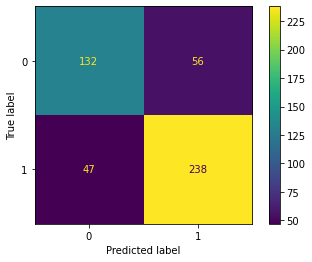

In [542]:
plot_confusion_matrix(gs_cv_model,X_train,y_train)

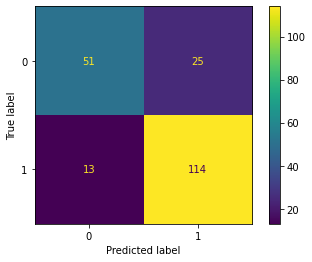

In [543]:
plot_confusion_matrix(gs_cv_model,X_test,y_test)

In [549]:
# comparing the AUC score betten the Decision tree model (best_model) and the grid search cv model(g_s_model)

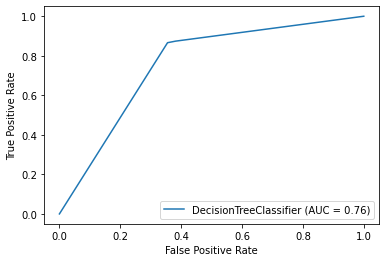

In [551]:
plot_roc_curve(best_model,X_test,y_test)

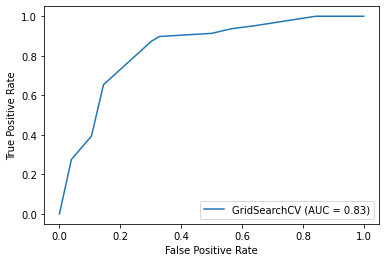

In [552]:
plot_roc_curve(gs_cv_model,X_test,y_test)

* We can see that AUC score of nthe grid search cv model is way higher than the normal decision tree model.
* Thus the grid search model is our best model.

In [554]:
best_model = grid_search_cv

In [556]:
train_n_ret_scores(best_model)

Fitting 3 folds for each of 294 candidates, totalling 882 fits
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=2, score=0.627, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=2, score=0.652, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=2, score=0.605, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=3, score=0.627, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=3, score=0.652, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=3, score=0.605, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=4 ...........................
[CV]  ma

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] max_leaf_nodes=4, min_samples_split=4 ...........................
[CV]  max_leaf_nodes=4, min_samples_split=4, score=0.541, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=5, min_samples_split=2, score=0.658, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=5, min_samples_split=2, score=0.703, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=5, min_samples_split=2, score=0.541, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=5, min_samples_split=3, score=0.658, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=5, min_samples_split=3, score=0.703, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=5, min_samples_split=3, score=0.541, total=   0.0

[CV]  max_leaf_nodes=13, min_samples_split=4, score=0.707, total=   0.0s
[CV] max_leaf_nodes=14, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=14, min_samples_split=2, score=0.684, total=   0.0s
[CV] max_leaf_nodes=14, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=14, min_samples_split=2, score=0.728, total=   0.0s
[CV] max_leaf_nodes=14, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=14, min_samples_split=2, score=0.726, total=   0.0s
[CV] max_leaf_nodes=14, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=14, min_samples_split=3, score=0.684, total=   0.0s
[CV] max_leaf_nodes=14, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=14, min_samples_split=3, score=0.728, total=   0.0s
[CV] max_leaf_nodes=14, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=14, min_samples_split=3, score=0.726, total=   0.0s
[CV] max_leaf_nodes=14, min_samples_split=4 ...................

[CV] max_leaf_nodes=22, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=22, min_samples_split=3, score=0.665, total=   0.0s
[CV] max_leaf_nodes=22, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=22, min_samples_split=3, score=0.715, total=   0.0s
[CV] max_leaf_nodes=22, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=22, min_samples_split=3, score=0.720, total=   0.0s
[CV] max_leaf_nodes=22, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=22, min_samples_split=4, score=0.677, total=   0.0s
[CV] max_leaf_nodes=22, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=22, min_samples_split=4, score=0.715, total=   0.0s
[CV] max_leaf_nodes=22, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=22, min_samples_split=4, score=0.720, total=   0.0s
[CV] max_leaf_nodes=23, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=23, min_samples_split=2, score=0.671, total=

[CV]  max_leaf_nodes=30, min_samples_split=4, score=0.652, total=   0.0s
[CV] max_leaf_nodes=30, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=30, min_samples_split=4, score=0.669, total=   0.0s
[CV] max_leaf_nodes=31, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=31, min_samples_split=2, score=0.652, total=   0.0s
[CV] max_leaf_nodes=31, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=31, min_samples_split=2, score=0.646, total=   0.0s
[CV] max_leaf_nodes=31, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=31, min_samples_split=2, score=0.675, total=   0.0s
[CV] max_leaf_nodes=31, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=31, min_samples_split=3, score=0.652, total=   0.0s
[CV] max_leaf_nodes=31, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=31, min_samples_split=3, score=0.646, total=   0.0s
[CV] max_leaf_nodes=31, min_samples_split=3 ...................

[CV]  max_leaf_nodes=39, min_samples_split=2, score=0.656, total=   0.0s
[CV] max_leaf_nodes=39, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=39, min_samples_split=3, score=0.658, total=   0.0s
[CV] max_leaf_nodes=39, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=39, min_samples_split=3, score=0.620, total=   0.0s
[CV] max_leaf_nodes=39, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=39, min_samples_split=3, score=0.656, total=   0.0s
[CV] max_leaf_nodes=39, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=39, min_samples_split=4, score=0.658, total=   0.0s
[CV] max_leaf_nodes=39, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=39, min_samples_split=4, score=0.620, total=   0.0s
[CV] max_leaf_nodes=39, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=39, min_samples_split=4, score=0.643, total=   0.0s
[CV] max_leaf_nodes=40, min_samples_split=2 ...................

[CV]  max_leaf_nodes=47, min_samples_split=3, score=0.620, total=   0.0s
[CV] max_leaf_nodes=47, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=47, min_samples_split=3, score=0.637, total=   0.0s
[CV] max_leaf_nodes=47, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=47, min_samples_split=4, score=0.671, total=   0.0s
[CV] max_leaf_nodes=47, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=47, min_samples_split=4, score=0.627, total=   0.0s
[CV] max_leaf_nodes=47, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=47, min_samples_split=4, score=0.643, total=   0.0s
[CV] max_leaf_nodes=48, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=48, min_samples_split=2, score=0.671, total=   0.0s
[CV] max_leaf_nodes=48, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=48, min_samples_split=2, score=0.620, total=   0.0s
[CV] max_leaf_nodes=48, min_samples_split=2 ...................

[CV]  max_leaf_nodes=55, min_samples_split=4, score=0.601, total=   0.0s
[CV] max_leaf_nodes=55, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=55, min_samples_split=4, score=0.643, total=   0.0s
[CV] max_leaf_nodes=56, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=56, min_samples_split=2, score=0.671, total=   0.0s
[CV] max_leaf_nodes=56, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=56, min_samples_split=2, score=0.595, total=   0.0s
[CV] max_leaf_nodes=56, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=56, min_samples_split=2, score=0.637, total=   0.0s
[CV] max_leaf_nodes=56, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=56, min_samples_split=3, score=0.671, total=   0.0s
[CV] max_leaf_nodes=56, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=56, min_samples_split=3, score=0.601, total=   0.0s
[CV] max_leaf_nodes=56, min_samples_split=3 ...................

[CV]  max_leaf_nodes=64, min_samples_split=2, score=0.658, total=   0.0s
[CV] max_leaf_nodes=64, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=64, min_samples_split=2, score=0.601, total=   0.0s
[CV] max_leaf_nodes=64, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=64, min_samples_split=2, score=0.637, total=   0.0s
[CV] max_leaf_nodes=64, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=64, min_samples_split=3, score=0.652, total=   0.0s
[CV] max_leaf_nodes=64, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=64, min_samples_split=3, score=0.601, total=   0.0s
[CV] max_leaf_nodes=64, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=64, min_samples_split=3, score=0.637, total=   0.0s
[CV] max_leaf_nodes=64, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=64, min_samples_split=4, score=0.652, total=   0.0s
[CV] max_leaf_nodes=64, min_samples_split=4 ...................

[CV]  max_leaf_nodes=72, min_samples_split=3, score=0.652, total=   0.0s
[CV] max_leaf_nodes=72, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=72, min_samples_split=3, score=0.608, total=   0.0s
[CV] max_leaf_nodes=72, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=72, min_samples_split=3, score=0.637, total=   0.0s
[CV] max_leaf_nodes=72, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=72, min_samples_split=4, score=0.652, total=   0.0s
[CV] max_leaf_nodes=72, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=72, min_samples_split=4, score=0.589, total=   0.0s
[CV] max_leaf_nodes=72, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=72, min_samples_split=4, score=0.643, total=   0.0s
[CV] max_leaf_nodes=73, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=73, min_samples_split=2, score=0.658, total=   0.0s
[CV] max_leaf_nodes=73, min_samples_split=2 ...................

[CV]  max_leaf_nodes=80, min_samples_split=3, score=0.643, total=   0.0s
[CV] max_leaf_nodes=80, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=80, min_samples_split=4, score=0.633, total=   0.0s
[CV] max_leaf_nodes=80, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=80, min_samples_split=4, score=0.589, total=   0.0s
[CV] max_leaf_nodes=80, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=80, min_samples_split=4, score=0.637, total=   0.0s
[CV] max_leaf_nodes=81, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=81, min_samples_split=2, score=0.671, total=   0.0s
[CV] max_leaf_nodes=81, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=81, min_samples_split=2, score=0.595, total=   0.0s
[CV] max_leaf_nodes=81, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=81, min_samples_split=2, score=0.637, total=   0.0s
[CV] max_leaf_nodes=81, min_samples_split=3 ...................

[CV]  max_leaf_nodes=88, min_samples_split=3, score=0.608, total=   0.0s
[CV] max_leaf_nodes=88, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=88, min_samples_split=3, score=0.637, total=   0.0s
[CV] max_leaf_nodes=88, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=88, min_samples_split=4, score=0.620, total=   0.0s
[CV] max_leaf_nodes=88, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=88, min_samples_split=4, score=0.589, total=   0.0s
[CV] max_leaf_nodes=88, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=88, min_samples_split=4, score=0.637, total=   0.0s
[CV] max_leaf_nodes=89, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=89, min_samples_split=2, score=0.658, total=   0.0s
[CV] max_leaf_nodes=89, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=89, min_samples_split=2, score=0.595, total=   0.0s
[CV] max_leaf_nodes=89, min_samples_split=2 ...................

[CV]  max_leaf_nodes=96, min_samples_split=3, score=0.608, total=   0.0s
[CV] max_leaf_nodes=96, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=96, min_samples_split=3, score=0.637, total=   0.0s
[CV] max_leaf_nodes=96, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=96, min_samples_split=4, score=0.620, total=   0.0s
[CV] max_leaf_nodes=96, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=96, min_samples_split=4, score=0.589, total=   0.0s
[CV] max_leaf_nodes=96, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=96, min_samples_split=4, score=0.637, total=   0.0s
[CV] max_leaf_nodes=97, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=97, min_samples_split=2, score=0.646, total=   0.0s
[CV] max_leaf_nodes=97, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=97, min_samples_split=2, score=0.595, total=   0.0s
[CV] max_leaf_nodes=97, min_samples_split=2 ...................

[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    6.5s finished


* Train_Acc: 0.7822410147991543
* Test_Acc: 0.812807881773399
* Recall: 0.8976377952755905
* Precision: 0.8976377952755905
* F1: 0.8976377952755905

In [558]:
best_model.predict_proba(X_test)

array([[0.27272727, 0.72727273],
       [0.52941176, 0.47058824],
       [0.09278351, 0.90721649],
       [0.09278351, 0.90721649],
       [0.27272727, 0.72727273],
       [0.125     , 0.875     ],
       [0.27272727, 0.72727273],
       [0.26027397, 0.73972603],
       [0.26027397, 0.73972603],
       [0.09278351, 0.90721649],
       [0.27272727, 0.72727273],
       [0.26027397, 0.73972603],
       [0.26027397, 0.73972603],
       [0.09278351, 0.90721649],
       [0.125     , 0.875     ],
       [0.26027397, 0.73972603],
       [0.52941176, 0.47058824],
       [0.26027397, 0.73972603],
       [0.52941176, 0.47058824],
       [0.77777778, 0.22222222],
       [1.        , 0.        ],
       [0.26027397, 0.73972603],
       [0.09278351, 0.90721649],
       [0.09278351, 0.90721649],
       [0.11111111, 0.88888889],
       [0.91666667, 0.08333333],
       [0.09278351, 0.90721649],
       [0.27272727, 0.72727273],
       [1.        , 0.        ],
       [0.27272727, 0.72727273],
       [0.

In [557]:
# saving the final best model
import joblib
joblib.dump(best_model,'Absenteeism.pkl')

['Absenteeism.pkl']